In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

In [ ]:
print(pd.__version__)
print(np.__version__)
print(gpd.__version__)
print(cf.__version__)
print(sns.__version__)

1.5.3
1.23.5
0.13.2
0.17.3
0.12.2


In [ ]:
with zipfile.ZipFile('indian_crime.zip', 'r') as zip_ref:
    zip_ref.extractall('sample_data')

In [ ]:
victims = pd.read_csv('/content/sample_data/20_Victims_of_rape.csv')
police_hr = pd.read_csv('/content/sample_data/35_Human_rights_violation_by_police.csv')
auto_theft = pd.read_csv('/content/sample_data/30_Auto_theft.csv')
prop_theft = pd.read_csv('/content/sample_data/10_Property_stolen_and_recovered.csv')

In [ ]:
victims.sample(10)

Area_Name  Year                Subgroup  Rape_Cases_Reported  \
224   Dadra & Nagar Haveli  2005   Victims of Other Rape                    5   
343                Gujarat  2005  Victims of Incest Rape                   19   
810                 Punjab  2001      Total Rape Victims                  298   
957                Tripura  2010      Total Rape Victims                  238   
978          Uttar Pradesh  2007      Total Rape Victims                 1648   
162             Chandigarh  2005      Total Rape Victims                   33   
611            Maharashtra  2004   Victims of Other Rape                 1357   
1006           Uttarakhand  2006  Victims of Incest Rape                    6   
223   Dadra & Nagar Haveli  2005  Victims of Incest Rape                    0   
998            Uttarakhand  2003   Victims of Other Rape                  105   

      Victims_Above_50_Yrs  Victims_Between_10-14_Yrs  \
224                      0                          0   
343                      0                          4   
810                      1                         30   
957                      0                         27   
978                      0                        109   
162                      0                          4   
611                      5                        128   
1006                     0                          3   
223                      0                          0   
998                      0                          4   

      Victims_Between_14-18_Yrs  Victims_Between_18-30_Yrs  \
224                           0                          5   
343                           5                          8   
810                         137                         98   
957                          61                         93   
978                         349                        910   
162                          10                          5   
611                         404                        619   
1006                          0                          2   
223                           0                          0   
998                           6                         81   

      Victims_Between_30-50_Yrs  Victims_of_Rape_Total  Victims_Upto_10_Yrs  
224                           0                      5                    0  
343                           0                     19                    2  
810                          24                    298                    8  
957                          38                    238                   19  
978                         267                   1648                   13  
162                           7                     33                    7  
611                         122                   1360                   82  
1006                          1                      6                    0  
223                           0                      0                    0  
998                          13                    105                    1

In [ ]:
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 57.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
inc_victims = victims[victims['Subgroup']=='Victims of Incest Rape']

g = pd.DataFrame(inc_victims.groupby(['Year'])['Rape_Cases_Reported'].sum().reset_index())
g.columns = ['Year','Cases Reported']

fig = px.bar(g,x='Year',y='Cases Reported',color_discrete_sequence=['blue'])
fig.show()
fig.write_html("figure1.html")

In 2005, around 750 cases were reported which is the highest number of that decade.
The year 2010 recorded the lowest number of cases i.e 288.

**State-wise Distribution of Rape Cases in India**

In [ ]:
with zipfile.ZipFile('india.zip', 'r') as zip_ref:
    zip_ref.extractall('sample_data')

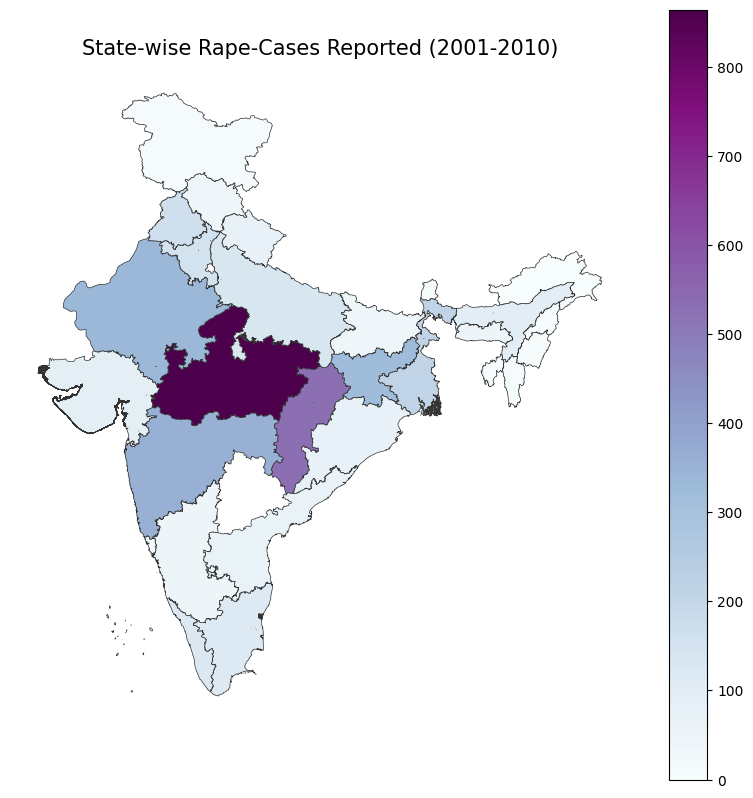

In [ ]:
g1 = pd.DataFrame(inc_victims.groupby(['Area_Name'])['Rape_Cases_Reported'].sum().reset_index())
g1.columns = ['State/UT','Cases Reported']
g1.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('/content/sample_data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g1.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Rape-Cases Reported (2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='BuPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

1.   Top 3 states having highest number of cases - **Madhya Pradhesh, Chhatisgarh, Rajasthan**
2.  Top 3 states having lowest number of cases - **Tripura, Manipur, Goa**

**Distribution of age groups of victims**

In [ ]:
above_50 = inc_victims['Victims_Above_50_Yrs'].sum()
ten_to_14 = inc_victims['Victims_Between_10-14_Yrs'].sum()
fourteen_to_18 = inc_victims['Victims_Between_14-18_Yrs'].sum()
eighteen_to_30 = inc_victims['Victims_Between_18-30_Yrs'].sum()
thirty_to_50 = inc_victims['Victims_Between_30-50_Yrs'].sum()
upto_10 = inc_victims['Victims_Upto_10_Yrs'].sum()

age_grp = ['Upto 10','10 to 14','14 to 18','18 to 30','30 to 50','Above 50']
age_group_vals = [upto_10,ten_to_14,fourteen_to_18,eighteen_to_30,thirty_to_50,above_50]

fig = go.Figure(data=[go.Pie(labels=age_grp, values=age_group_vals,sort=False,
                            marker=dict(colors=px.colors.qualitative.G10),textfont_size=12)])

fig.show()
fig.write_html("figure2.html")

*  Women between the age group of 18-30 have been most affected
*  Women between the age group above 50 have been least affected

**Cases of Human Rights Violation**

In [ ]:
g3 = pd.DataFrame(police_hr.groupby(['Year'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
g3.columns = ['Year','Cases Registered']

fig = px.bar(g3,x='Year',y='Cases Registered',color_discrete_sequence=['green'])
fig.show()
fig.write_html("figure3.html")

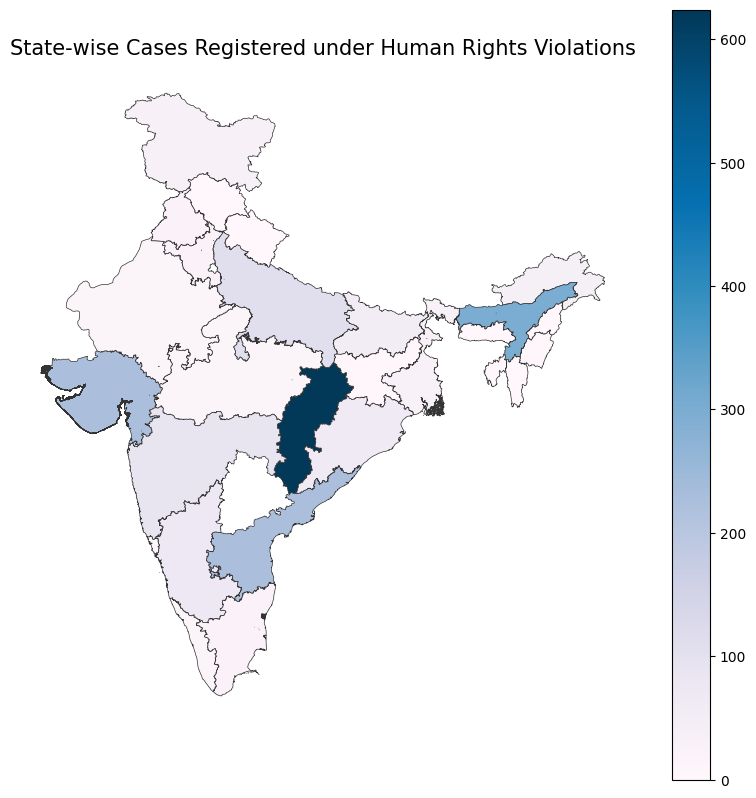

In [ ]:
g2 = pd.DataFrame(police_hr.groupby(['Area_Name'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
g2.columns = ['State/UT','Cases Reported']

g2.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('/content/sample_data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g2.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Cases Registered under Human Rights Violations',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='PuBu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

1.   Top 3 states with highest number of cases against police Chhatisgrah, Assam, Gujarat
2.   Top 3 states with lowest number of cases against police Manipur, Uttarakhand, Goa

In [ ]:
police_hr.Group_Name.value_counts()

HR_Total Violations by Police                 214
HR_Others Violations by Police                194
HR_Disappearance of Persons                   190
HR_Extortion                                  190
HR_Torture                                    190
HR_Atrocities on SC/ST                        188
HR_Illegal detention/arrests                  186
HR_Fake encounter killings                    185
HR_Indignity to Women                         185
HR_Violation against Terrorists/Extremists    182
HR_False implication                          182
HR_Failure in taking action                   181
Name: Group_Name, dtype: int64

Cases have been registered under the following heads:

1) Torture

2) Extortion

3) Disappearance of Persons

4) Atrocities on SC/ST

5) Illegal detention/arrests

6) Indignity to Women

7) Fake encounter killings

8) False implication

9) Violation against terrorists/extremists

10) Failure in taking action

11) Other violations

In [ ]:
fake_enc_df = police_hr[police_hr['Group_Name']=='HR_Fake encounter killings']
fake_enc_df.Cases_Registered_under_Human_Rights_Violations.sum()

16.0

**Cases of Human Rights Violation - False Implication**

In [ ]:
false_imp_df = police_hr[police_hr['Group_Name']=='HR_False implication']
false_imp_df.Cases_Registered_under_Human_Rights_Violations.sum()

29.0

**Policemen Chargesheeted vs Policemen Convicted**

In [ ]:
g4 = pd.DataFrame(police_hr.groupby(['Year'])['Policemen_Chargesheeted','Policemen_Convicted'].sum().reset_index())

year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

fig = go.Figure(data=[
    go.Bar(name='Policemen Chargesheeted', x=year, y=g4['Policemen_Chargesheeted'],
           marker_color='purple'),
    go.Bar(name='Policemen Convicted', x=year, y=g4['Policemen_Convicted'],
          marker_color='red')
])

fig.update_layout(barmode='group',xaxis_title='Year',yaxis_title='Number of policemen')
fig.show()
fig.write_html("figure4.html")

**Auto Theft cases**

State/UT wise number of vehicles stolen from 2001 to 2010

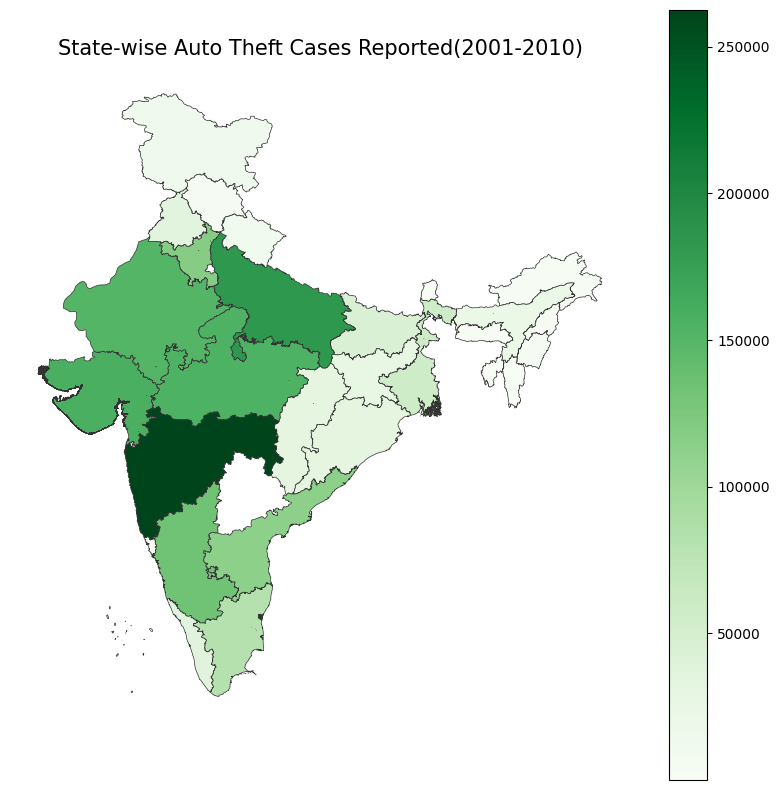

In [ ]:
g5 = pd.DataFrame(auto_theft.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
g5.columns = ['State/UT','Vehicle_Stolen']
g5.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('/content/sample_data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g5.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Auto Theft Cases Reported(2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Vehicle_Stolen', cmap='Greens', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

Year wise vehicles stolen

In [ ]:
g5 = pd.DataFrame(auto_theft.groupby(['Year'])['Auto_Theft_Stolen'].sum().reset_index())

g5.columns = ['Year','Vehicles Stolen']

fig = px.bar(g5,x='Year',y='Vehicles Stolen',color_discrete_sequence=['#17becf'])
fig.show()
fig.write_html("figure5.html")

Proportion of vehicles stolen, traced and recovered

In [ ]:
auto_theft_traced = auto_theft['Auto_Theft_Coordinated/Traced'].sum()
auto_theft_recovered = auto_theft['Auto_Theft_Recovered'].sum()
auto_theft_stolen = auto_theft['Auto_Theft_Stolen'].sum()

vehicle_group = ['Vehicles Stolen','Vehicles Traced','Vehicles Recovered']
vehicle_vals = [auto_theft_stolen,auto_theft_traced,auto_theft_recovered]

colors = ['crimson','gold','green']

fig = go.Figure(data=[go.Pie(labels=vehicle_group, values=vehicle_vals,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show()
fig.write_html("figure6.html")

Types of vehicles stolen

In [ ]:
vehicle_list = ['Motor Cycles/ Scooters','Motor Car/Taxi/Jeep','Buses',
               'Goods carrying vehicles (Trucks/Tempo etc)','Other Motor vehicles']

sr_no = [1,2,3,4,5]

fig = go.Figure(data=[go.Table(header=dict(values=['Sr No','Vehicle type'],
                                          fill_color='turquoise',
                                           height=30),
                 cells=dict(values=[sr_no,vehicle_list],
                            height=30))
                     ])
fig.show()
fig.write_html("figure7.html")

Top 10 States/UT with highest number of motor cycles stolen

In [ ]:
motor_c = auto_theft[auto_theft['Sub_Group_Name']=='1. Motor Cycles/ Scooters']

g8 = pd.DataFrame(motor_c.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
g8_sorted = g8.sort_values(['Auto_Theft_Stolen'],ascending=True)
fig = px.bar(g8_sorted.iloc[-10:,:], y='Area_Name', x='Auto_Theft_Stolen',
             orientation='h',color_discrete_sequence=['#008080'])
fig.show()
fig.write_html("figure8.html")

**Property theft cases**

State/UT wise number of property stolen cases from 2001 to 2010

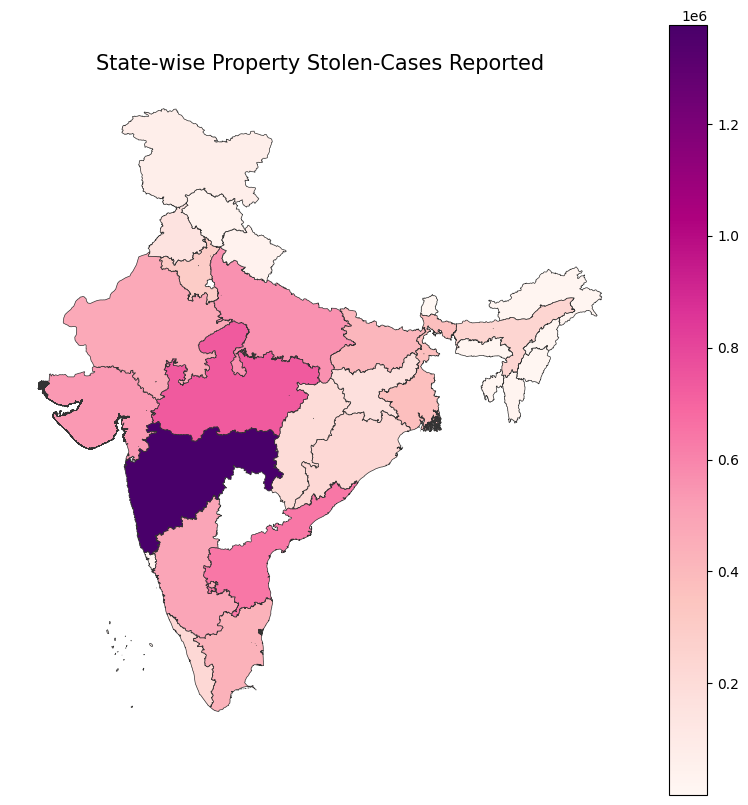

In [ ]:
g7 = pd.DataFrame(prop_theft.groupby(['Area_Name'])['Cases_Property_Stolen'].sum().reset_index())
g7.columns = ['State/UT','Cases Reported']
g7.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('/content/sample_data/India States/Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g7.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Property Stolen-Cases Reported',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

Types of property stolen cases
Cases have been registered under the following heads:

1) Dacoity

2) Criminal Breach of Trust

3) Robbery

4) Burglary

5) Theft

6) Others

Property stolen vs recovered

In [ ]:
prop_theft_recovered = prop_theft['Cases_Property_Recovered'].sum()
prop_theft_stolen = prop_theft['Cases_Property_Stolen'].sum()

prop_group = ['Property Stolen Cases','Property Recovered Cases']
prop_vals = [prop_theft_stolen,prop_theft_recovered]

colors = ['red','green']

fig = go.Figure(data=[go.Pie(labels=prop_group, values=prop_vals,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show()
fig.write_html("figure9.html")

Year-wise Value of Property Stolen and Recovered

In [ ]:
g9 = pd.DataFrame(prop_theft.groupby(['Year'])['Value_of_Property_Recovered','Value_of_Property_Stolen'].sum().reset_index())

year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

fig = go.Figure(data=[
    go.Bar(name='Property Recovered', x=year, y=g9['Value_of_Property_Recovered'],
           marker_color='gold'),
    go.Bar(name='Property Stolen', x=year, y=g9['Value_of_Property_Stolen'],
          marker_color='darkblue')
])

fig.update_layout(barmode='group',xaxis_title='Year',yaxis_title='Value in Rupees',
                 title='Year-wise Value of Property Stolen and Recovered')
fig.show()
fig.write_html("figure10.html")

**Crime against SC**

In [ ]:
sc1 = pd.read_csv('/content/sample_data/crime/02_01_District_wise_crimes_committed_against_SC_2001_2012.csv')

sc13= pd.read_csv("/content/sample_data/crime/02_01_District_wise_crimes_committed_against_SC_2013.csv")
sc13.columns

sc13 = sc13[['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt','Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act',
        'Other Crimes Against SCs']]
#combining 2 CSV files

frames = [sc1 , sc13]

sc = pd.concat(frames)

sc['STATE/UT'] = sc['STATE/UT'].str.capitalize()
sc['DISTRICT'] = sc['DISTRICT'].str.capitalize()


sc['STATE/UT'].unique()

array(['Andhra pradesh', 'Arunachal pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal pradesh',
       'Jammu & kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil nadu', 'Tripura', 'Uttar pradesh', 'Uttarakhand',
       'West bengal', 'A & n islands', 'Chandigarh', 'D & n haveli',
       'Daman & diu', 'Delhi', 'Lakshadweep', 'Puducherry', 'A&n islands',
       'D&n haveli', 'Delhi ut'], dtype=object)

In [ ]:
sc['STATE/UT'].replace(
    to_replace='Delhi ut',
    value='Delhi',
    inplace=True
)

sc['STATE/UT'].replace(
    to_replace='A&n islands',
    value='A & n islands',
    inplace=True
)




sc['STATE/UT'].replace(
    to_replace='D&n haveli',
    value='D & n haveli',
    inplace=True
)
sc['STATE/UT'].unique()

array(['Andhra pradesh', 'Arunachal pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal pradesh',
       'Jammu & kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil nadu', 'Tripura', 'Uttar pradesh', 'Uttarakhand',
       'West bengal', 'A & n islands', 'Chandigarh', 'D & n haveli',
       'Daman & diu', 'Delhi', 'Lakshadweep', 'Puducherry'], dtype=object)

In [ ]:
sc.sample(10)

STATE/UT    DISTRICT  Year  Murder  Rape  Kidnapping and Abduction  \
2692      Rajasthan     Jodhpur  2004       0     4                         0   
1085    Maharashtra    Kolhapur  2002       1     1                         0   
8808         Sikkim        East  2012       1     3                         0   
1979         Sikkim        West  2003       0     1                         0   
2112    West bengal     Asansol  2003       0     0                         0   
8041     Tamil nadu  Thiruvarur  2011       2     0                         0   
4886      Rajasthan       Baran  2007       2     4                         0   
1616        Haryana     Jhajjar  2003       0     0                         0   
6530  Uttar pradesh      Jhansi  2009       5     4                         0   
5494    Maharashtra    Bhandara  2008       0     1                         0   

      Dacoity  Robbery  Arson  Hurt  Prevention of atrocities (POA) Act  \
2692        0        0      1   140                                  13   
1085        0        0      0     0                                   0   
8808        0        0      0     0                                   0   
1979        0        0      0     0                                   0   
2112        0        0      0     0                                   0   
8041        0        0      0     2                                  27   
4886        0        0      0     2                                   3   
1616        0        0      0     0                                   1   
6530        0        0      0     0                                  59   
5494        1        0      1     3                                   8   

      Protection of Civil Rights (PCR) Act  Other Crimes Against SCs  
2692                                     0                        18  
1085                                    12                        20  
8808                                     0                         1  
1979                                     0                         1  
2112                                     0                         0  
8041                                     0                         0  
4886                                     0                        53  
1616                                     0                         1  
6530                                     0                         4  
5494                                     0                        15

In [ ]:
yearw = sc[sc.DISTRICT == 'Total']
yearw = yearw.groupby(['Year'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()
yearw['sum'] = yearw.drop('Year', axis=1).sum(axis=1)
yearw = yearw[['Year','sum']]

In [ ]:
scy = sc[sc.DISTRICT == 'Total']
scy = scy.groupby(['Year'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()

crimes = ['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']

fig = go.Figure()
fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Murder'],
                    name='Murder',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Rape'],
                    name='Rape',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Kidnapping and Abduction'],
                    name='Kidnapping and Abduction',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Dacoity'],
                    name='Dacoity',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Robbery'],
                    name='Robbery',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Arson'],
                    name='Arson',line=dict(color='skyblue', width=4)))
fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Hurt'],
                    name='Hurt',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Prevention of atrocities (POA) Act'],
                    name='Atrocities',line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Protection of Civil Rights (PCR) Act'],
                    mode='lines+markers',
                    name='Civil Rights Violations'))
fig.add_trace(go.Scatter(x= scy['Year'], y= scy['Other Crimes Against SCs'],
                    name='Other Crimes',line=dict(color='red', width=4)))

fig.update_layout(uniformtext_minsize= 20,
    title_text="Total Crimes Against Scs 2001-2013",

                 )

fig.show()
fig.write_html("figure11.html")

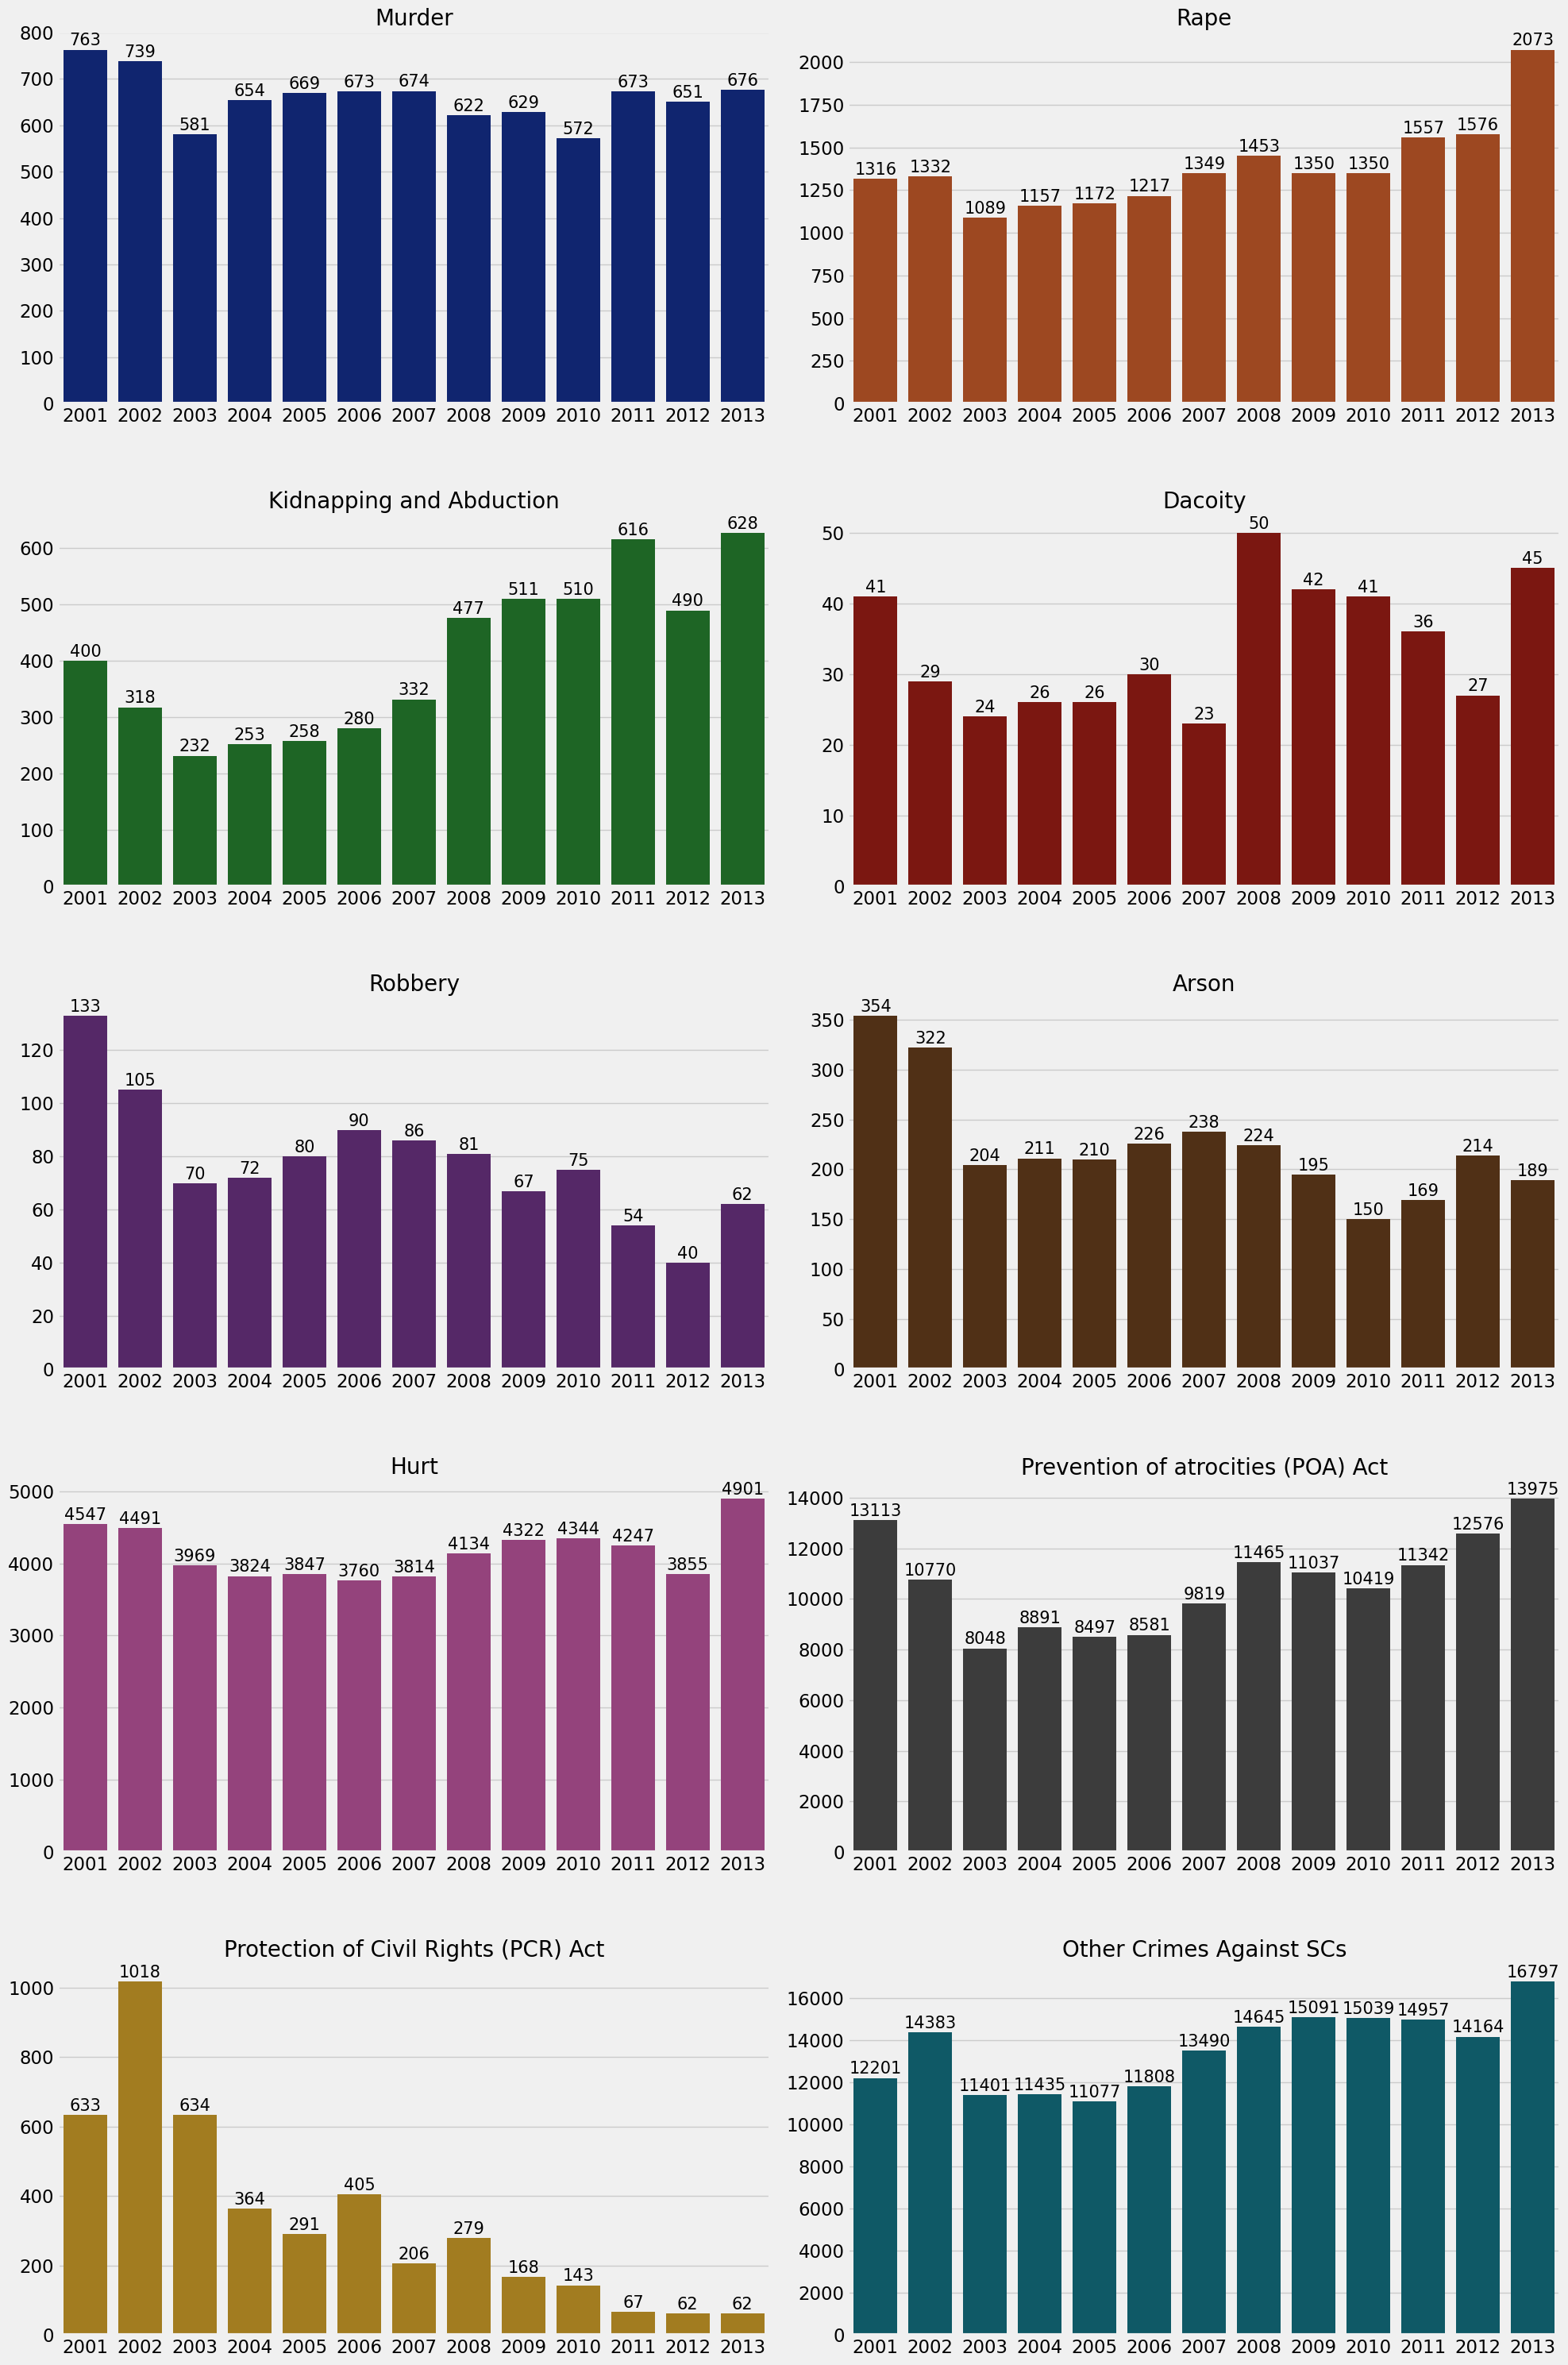

In [ ]:
scy2 = sc[sc.DISTRICT == 'Total']
scy2 = scy2.groupby(['Year'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()

#Plotting Graphs
import itertools
import seaborn as sns
sns.set_context("talk")
plt.style.use("fivethirtyeight")
palette = itertools.cycle(sns.color_palette("dark"))
columns = ['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']
plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')
for i,column in enumerate(columns):
    plt.subplot(5,2,i+1)
    ax= sns.barplot(data= scy2,x='Year',y= column ,color=next(palette) )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

# **Crime Distribution**

In [ ]:
scy = scy.append(scy.sum().rename('total'))
scy['Year'].replace(26091, 'Total', inplace=True)
scy = scy[scy['Year'] == 'Total']
scy_t = scy.T.reset_index()
scy_t

index   total
0                                   Year   Total
1                                 Murder    8576
2                                   Rape   17991
3               Kidnapping and Abduction    5305
4                                Dacoity     440
5                                Robbery    1015
6                                  Arson    2906
7                                   Hurt   54055
8     Prevention of atrocities (POA) Act  138533
9   Protection of Civil Rights (PCR) Act    4332
10              Other Crimes Against SCs  176488

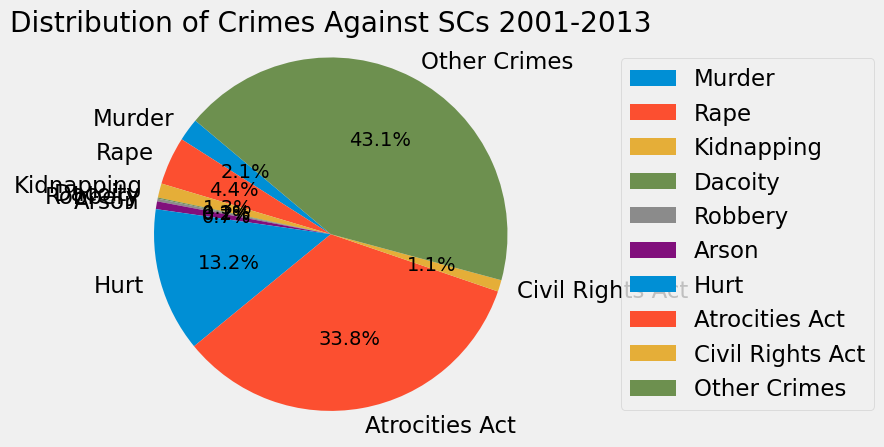

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['Murder', 'Rape', 'Kidnapping', 'Dacoity', 'Robbery', 'Arson', 'Hurt', 'Atrocities Act',
         'Civil Rights Act', 'Other Crimes']
values = [8576, 17991, 5305, 440, 1015, 2906, 54055, 138533, 4332, 176488]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Customize the plot
plt.title("Distribution of Crimes Against SCs 2001-2013")

# Adjust label positions to prevent overlapping
ax.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the plot
plt.show()

In [ ]:
stateyr = sc[sc.DISTRICT == 'Total']
stateyr = stateyr.groupby(['Year','STATE/UT'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()

In [ ]:
stateyr['sum'] =  stateyr.iloc[:, 2:].sum(axis=1)
stateyr2 = stateyr.groupby('STATE/UT')['sum'].sum().reset_index()
stateyr2 = stateyr2.sort_values('sum', ascending = False)

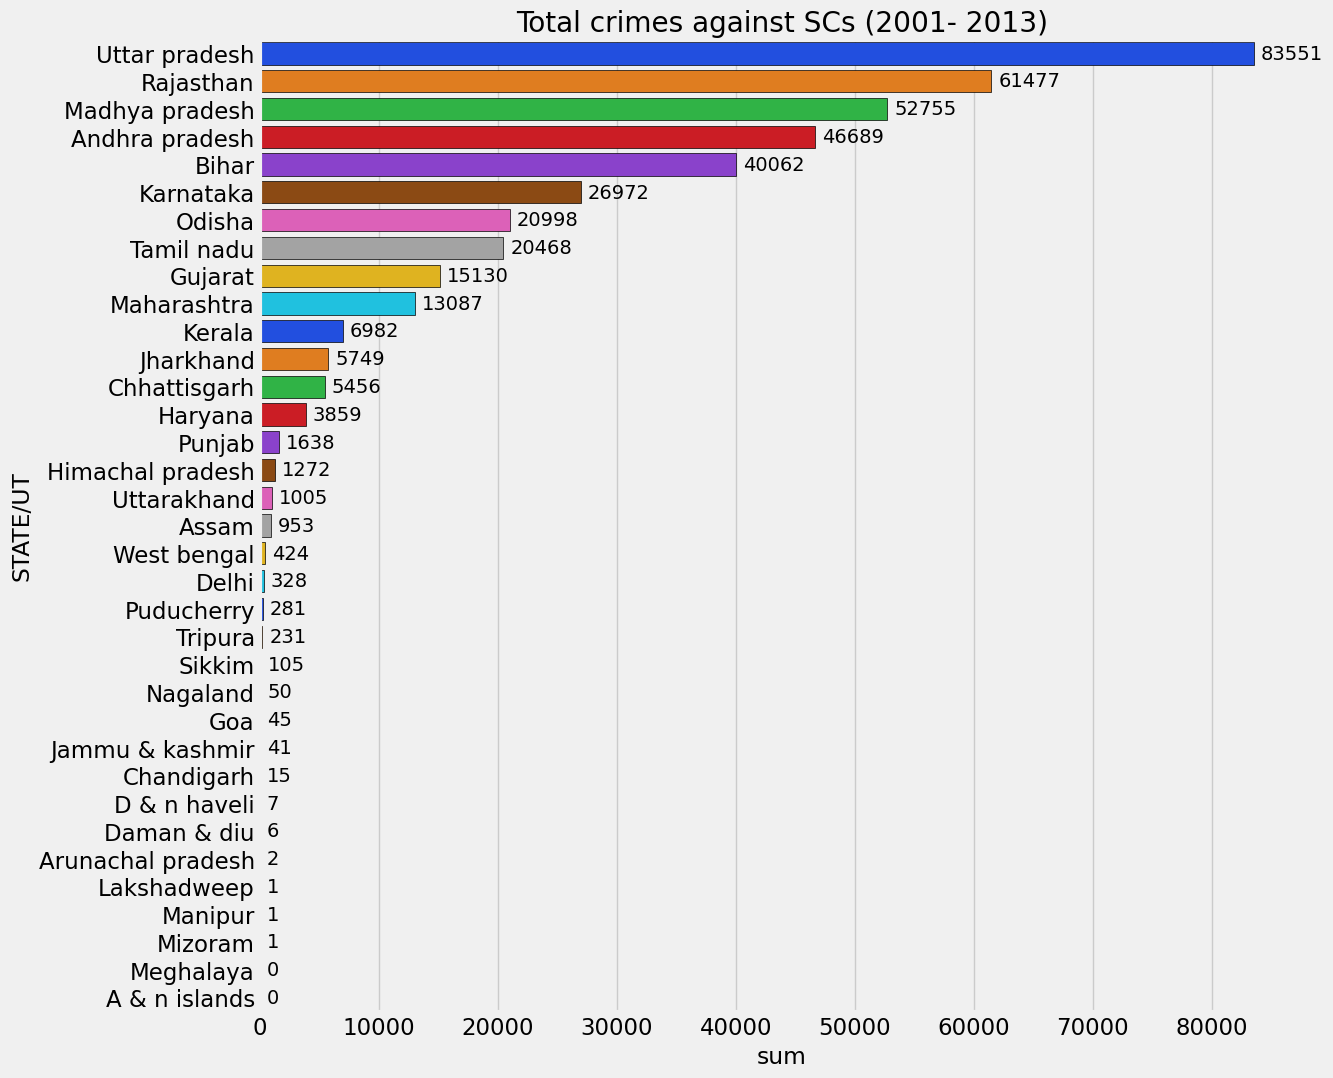

In [ ]:
plt.figure(figsize = (12,12))
sns.set_context("talk")
plt.style.use("fivethirtyeight")
ax = sns.barplot(x = 'sum', y = 'STATE/UT', data = stateyr2, palette = 'bright', edgecolor = 'black')
plt.title('Total crimes against SCs (2001- 2013)')
for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

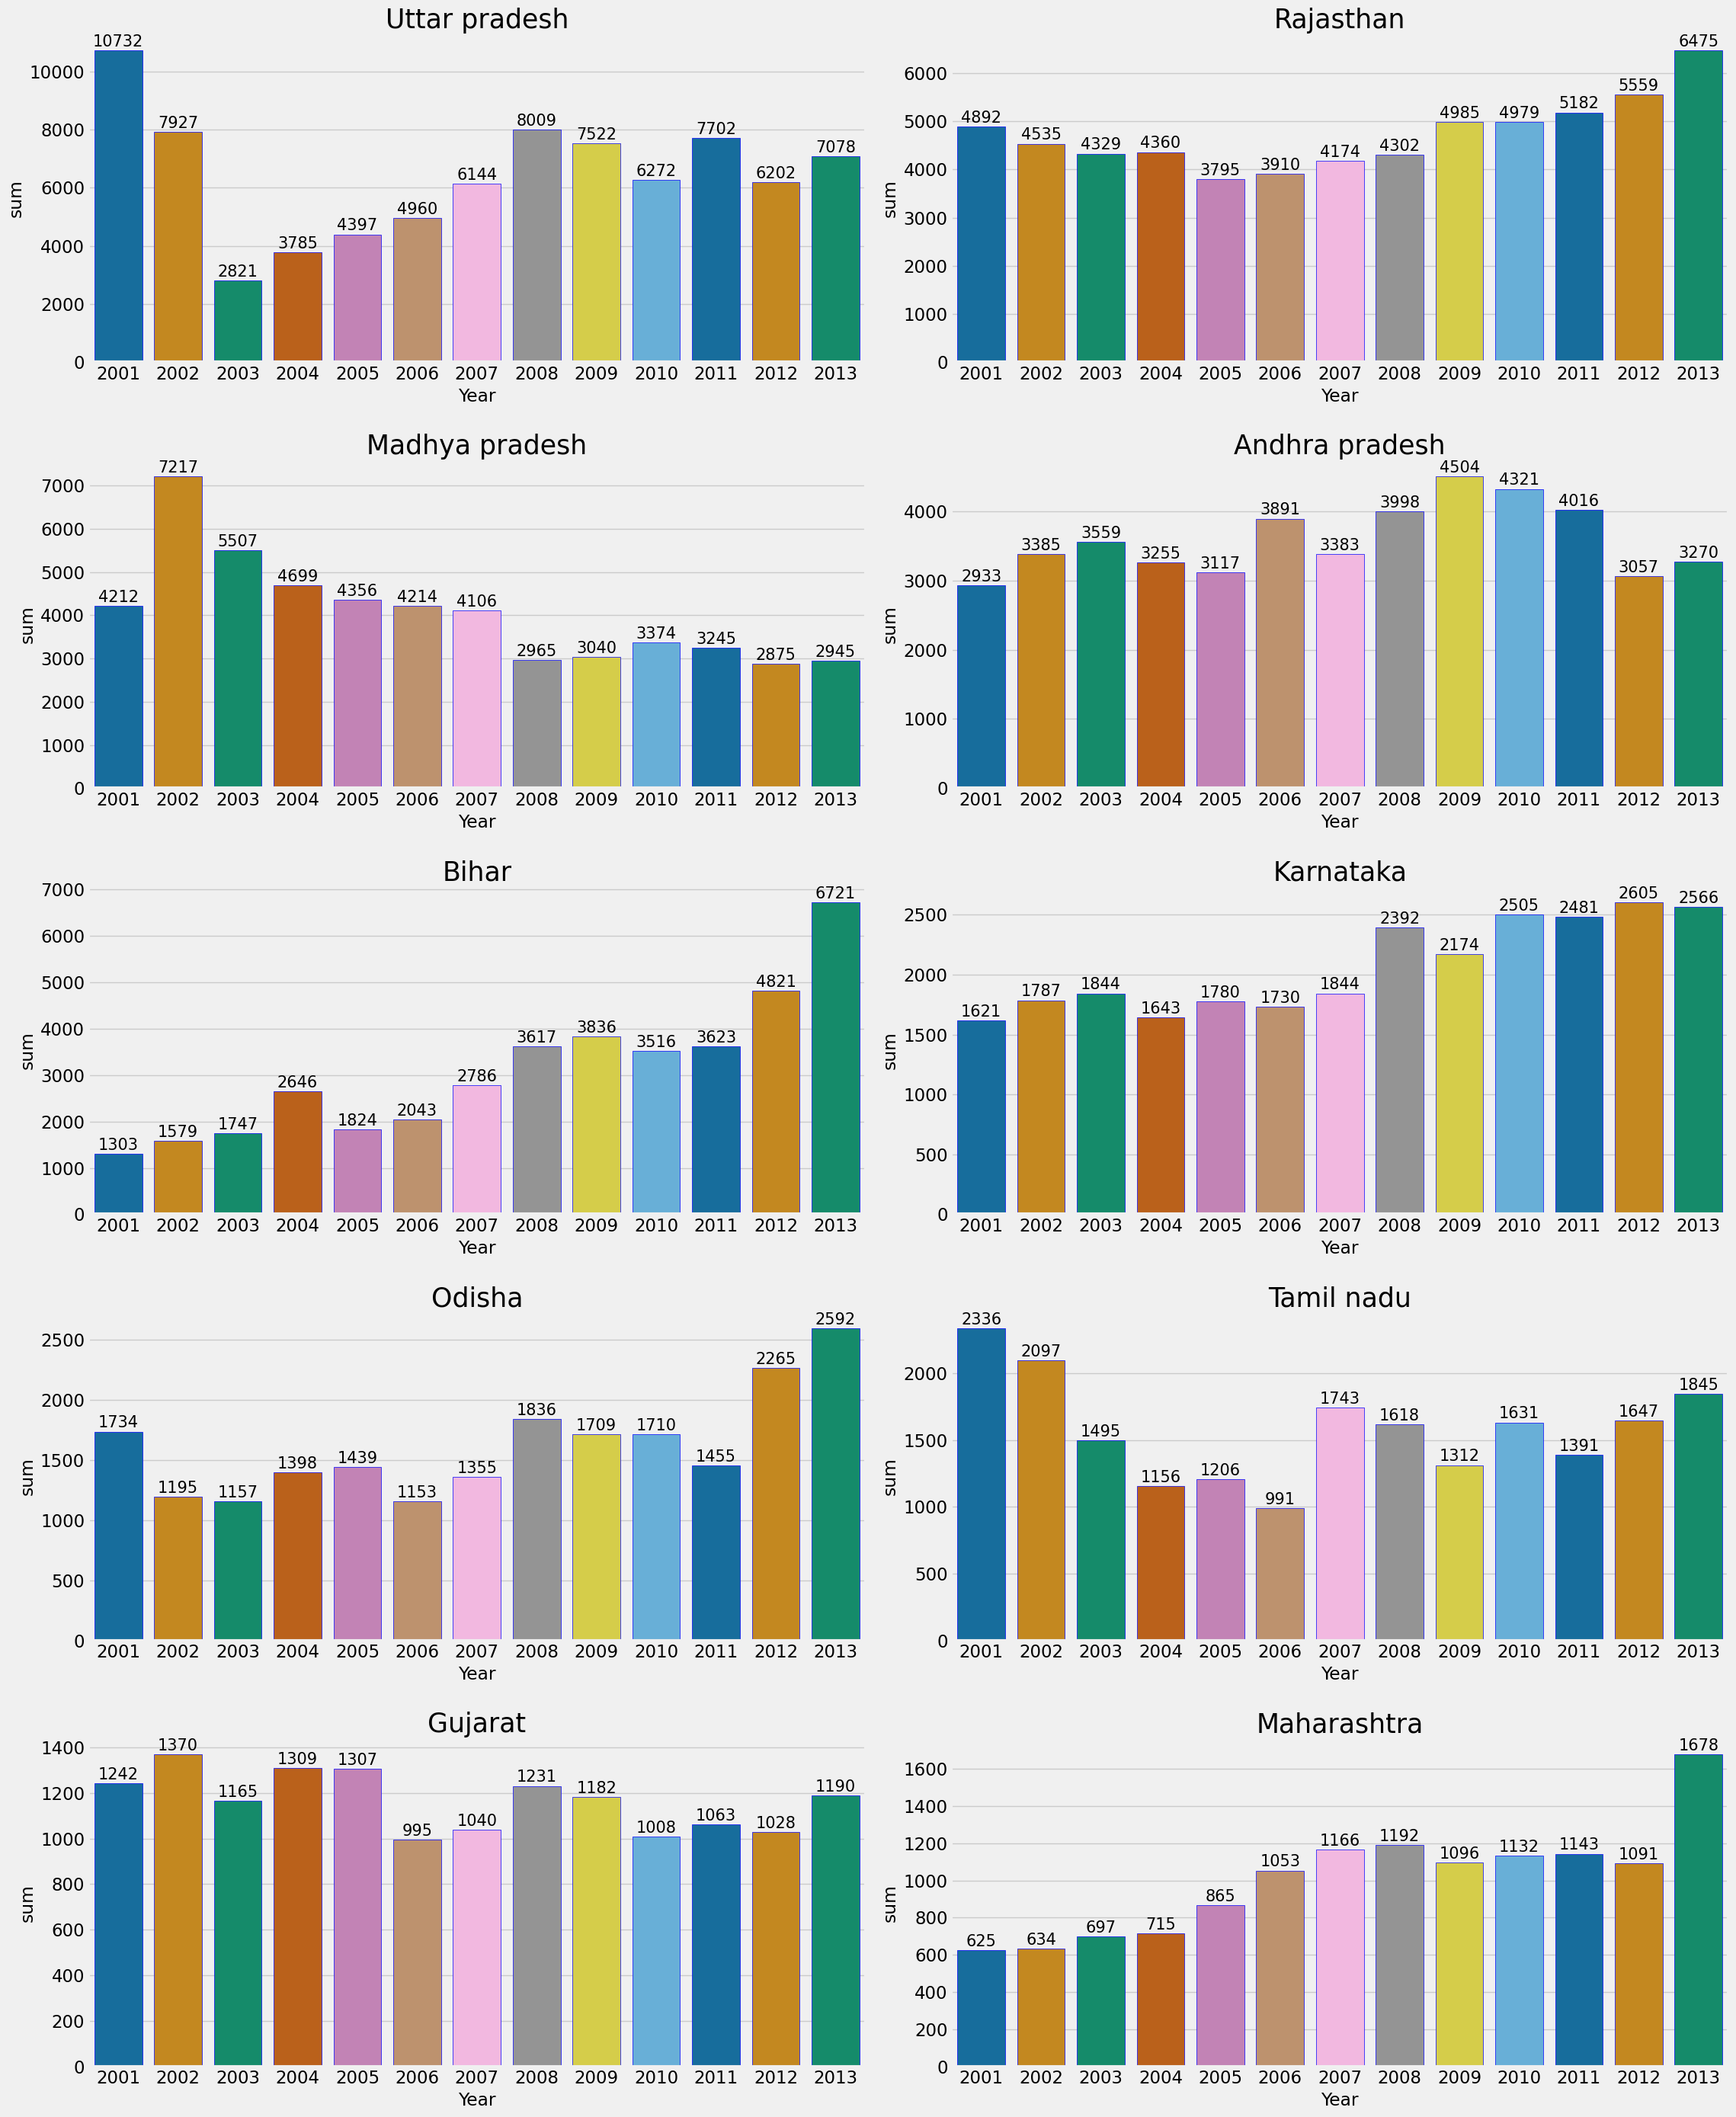

In [ ]:
states = ['Uttar pradesh','Rajasthan' ,'Madhya pradesh' , 'Andhra pradesh', 'Bihar', 'Karnataka' , 'Odisha' , 'Tamil nadu','Gujarat', 'Maharashtra']
sns.set_context("talk")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (23,28))

for i, s in enumerate(states):
    plt.subplot(5,2,i+1)
    stateyr3 = stateyr[stateyr['STATE/UT'] == s]
    ax = sns.barplot(x = 'Year' , y = 'sum' , data = stateyr3,ci=None , palette = 'colorblind' , edgecolor = 'blue')
    plt.title(s , size = 25)
    for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')
plt.tight_layout()
plt.subplots_adjust(hspace= .3)

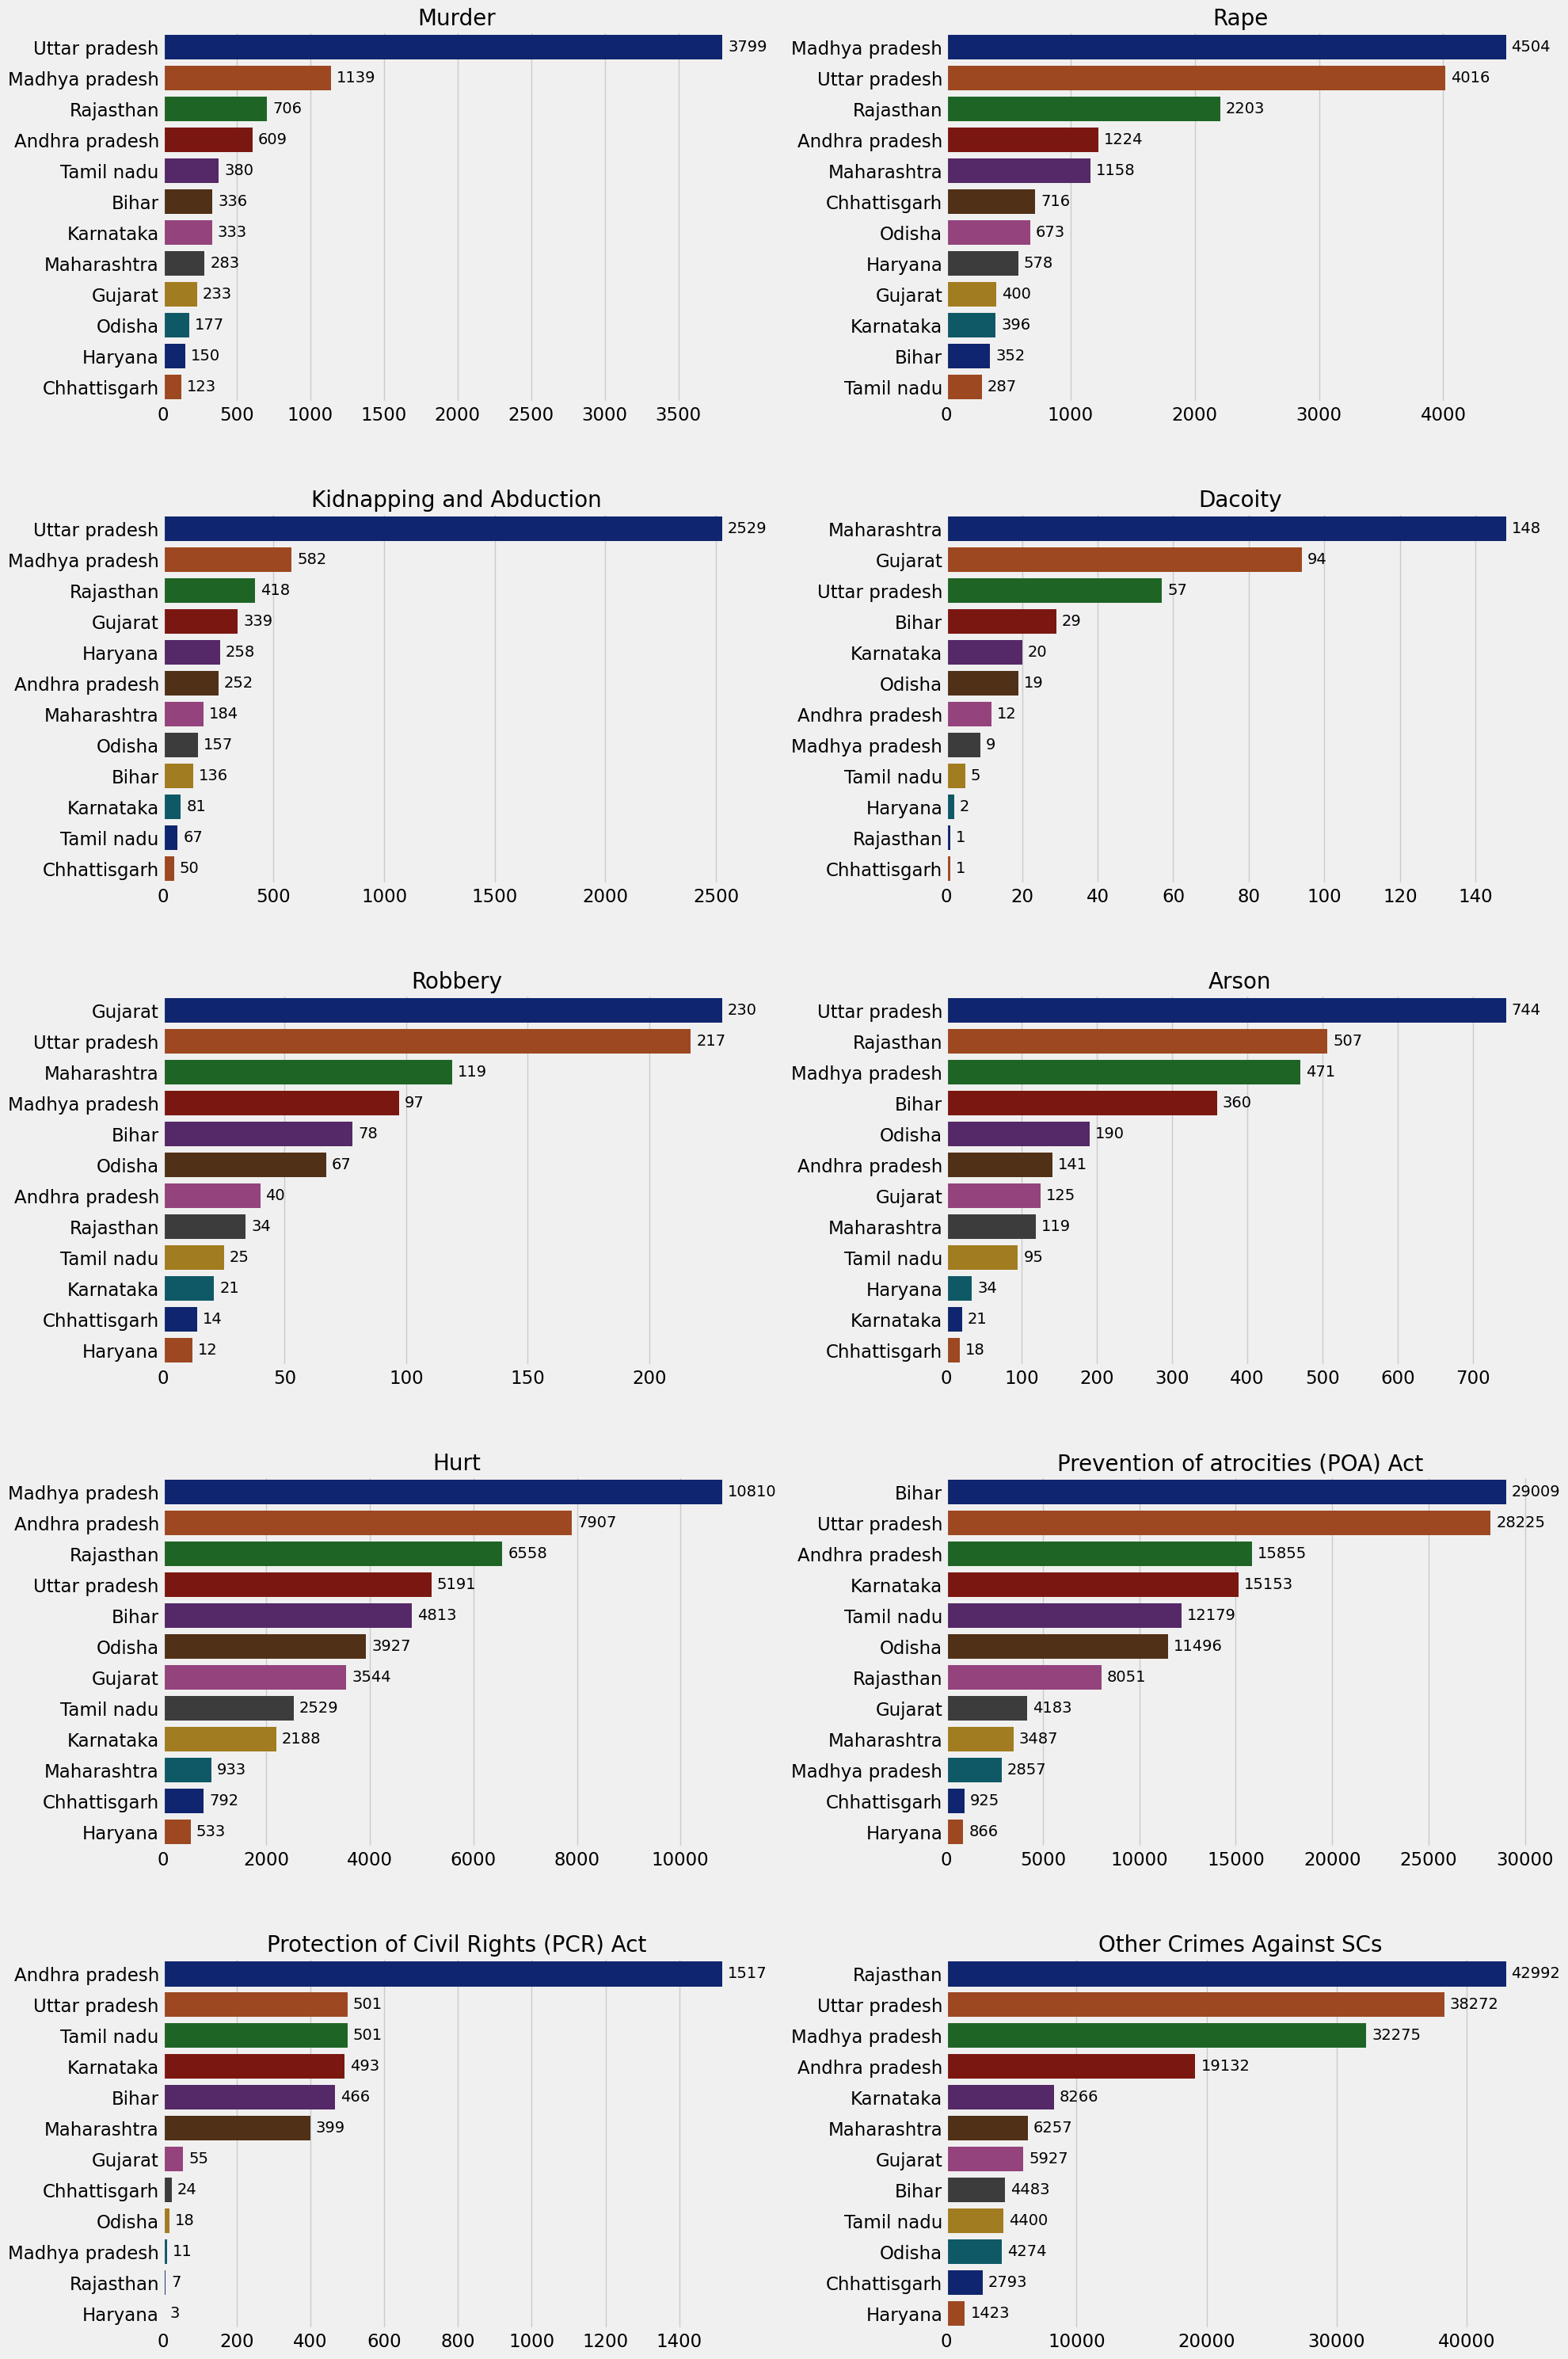

In [ ]:
scs = sc[sc.DISTRICT == 'Total']
scs = scs.groupby(['STATE/UT'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()

scs1 = scs[(scs.Murder > 100) & (scs.Rape > 100)]
sns.set_context("talk")

plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')

for i,column in enumerate(columns):
    scs1 = scs1.sort_values(column,ascending = False)
    plt.subplot(5,2,i+1)
    ax = sns.barplot(data= scs1,x= column ,y='STATE/UT',palette = 'dark' )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")




plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()


In [ ]:
scs['sum'] = scs.sum(axis = 1)

In [ ]:
new_row = scs.iloc[[1]]
scs = scs.append(new_row, ignore_index = True)
scs.at[35, 'STATE/UT']= 'Telangana'
scs.at[9,'STATE/UT'] = 'Nct of Delhi'

gdf = gpd.read_file("/content/sample_data/India States/Indian_states.shp")

gdf.st_nm = gdf.st_nm.str.lower()
scs['STATE/UT'] = scs['STATE/UT'].str.lower()

merged = gdf.merge(scs , left_on='st_nm', right_on='STATE/UT')
merged1 = merged.drop(['STATE/UT'], axis=1)

In [ ]:
!pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 24.6 MB/s eta 0:00:00
  Preparing metadata (setu

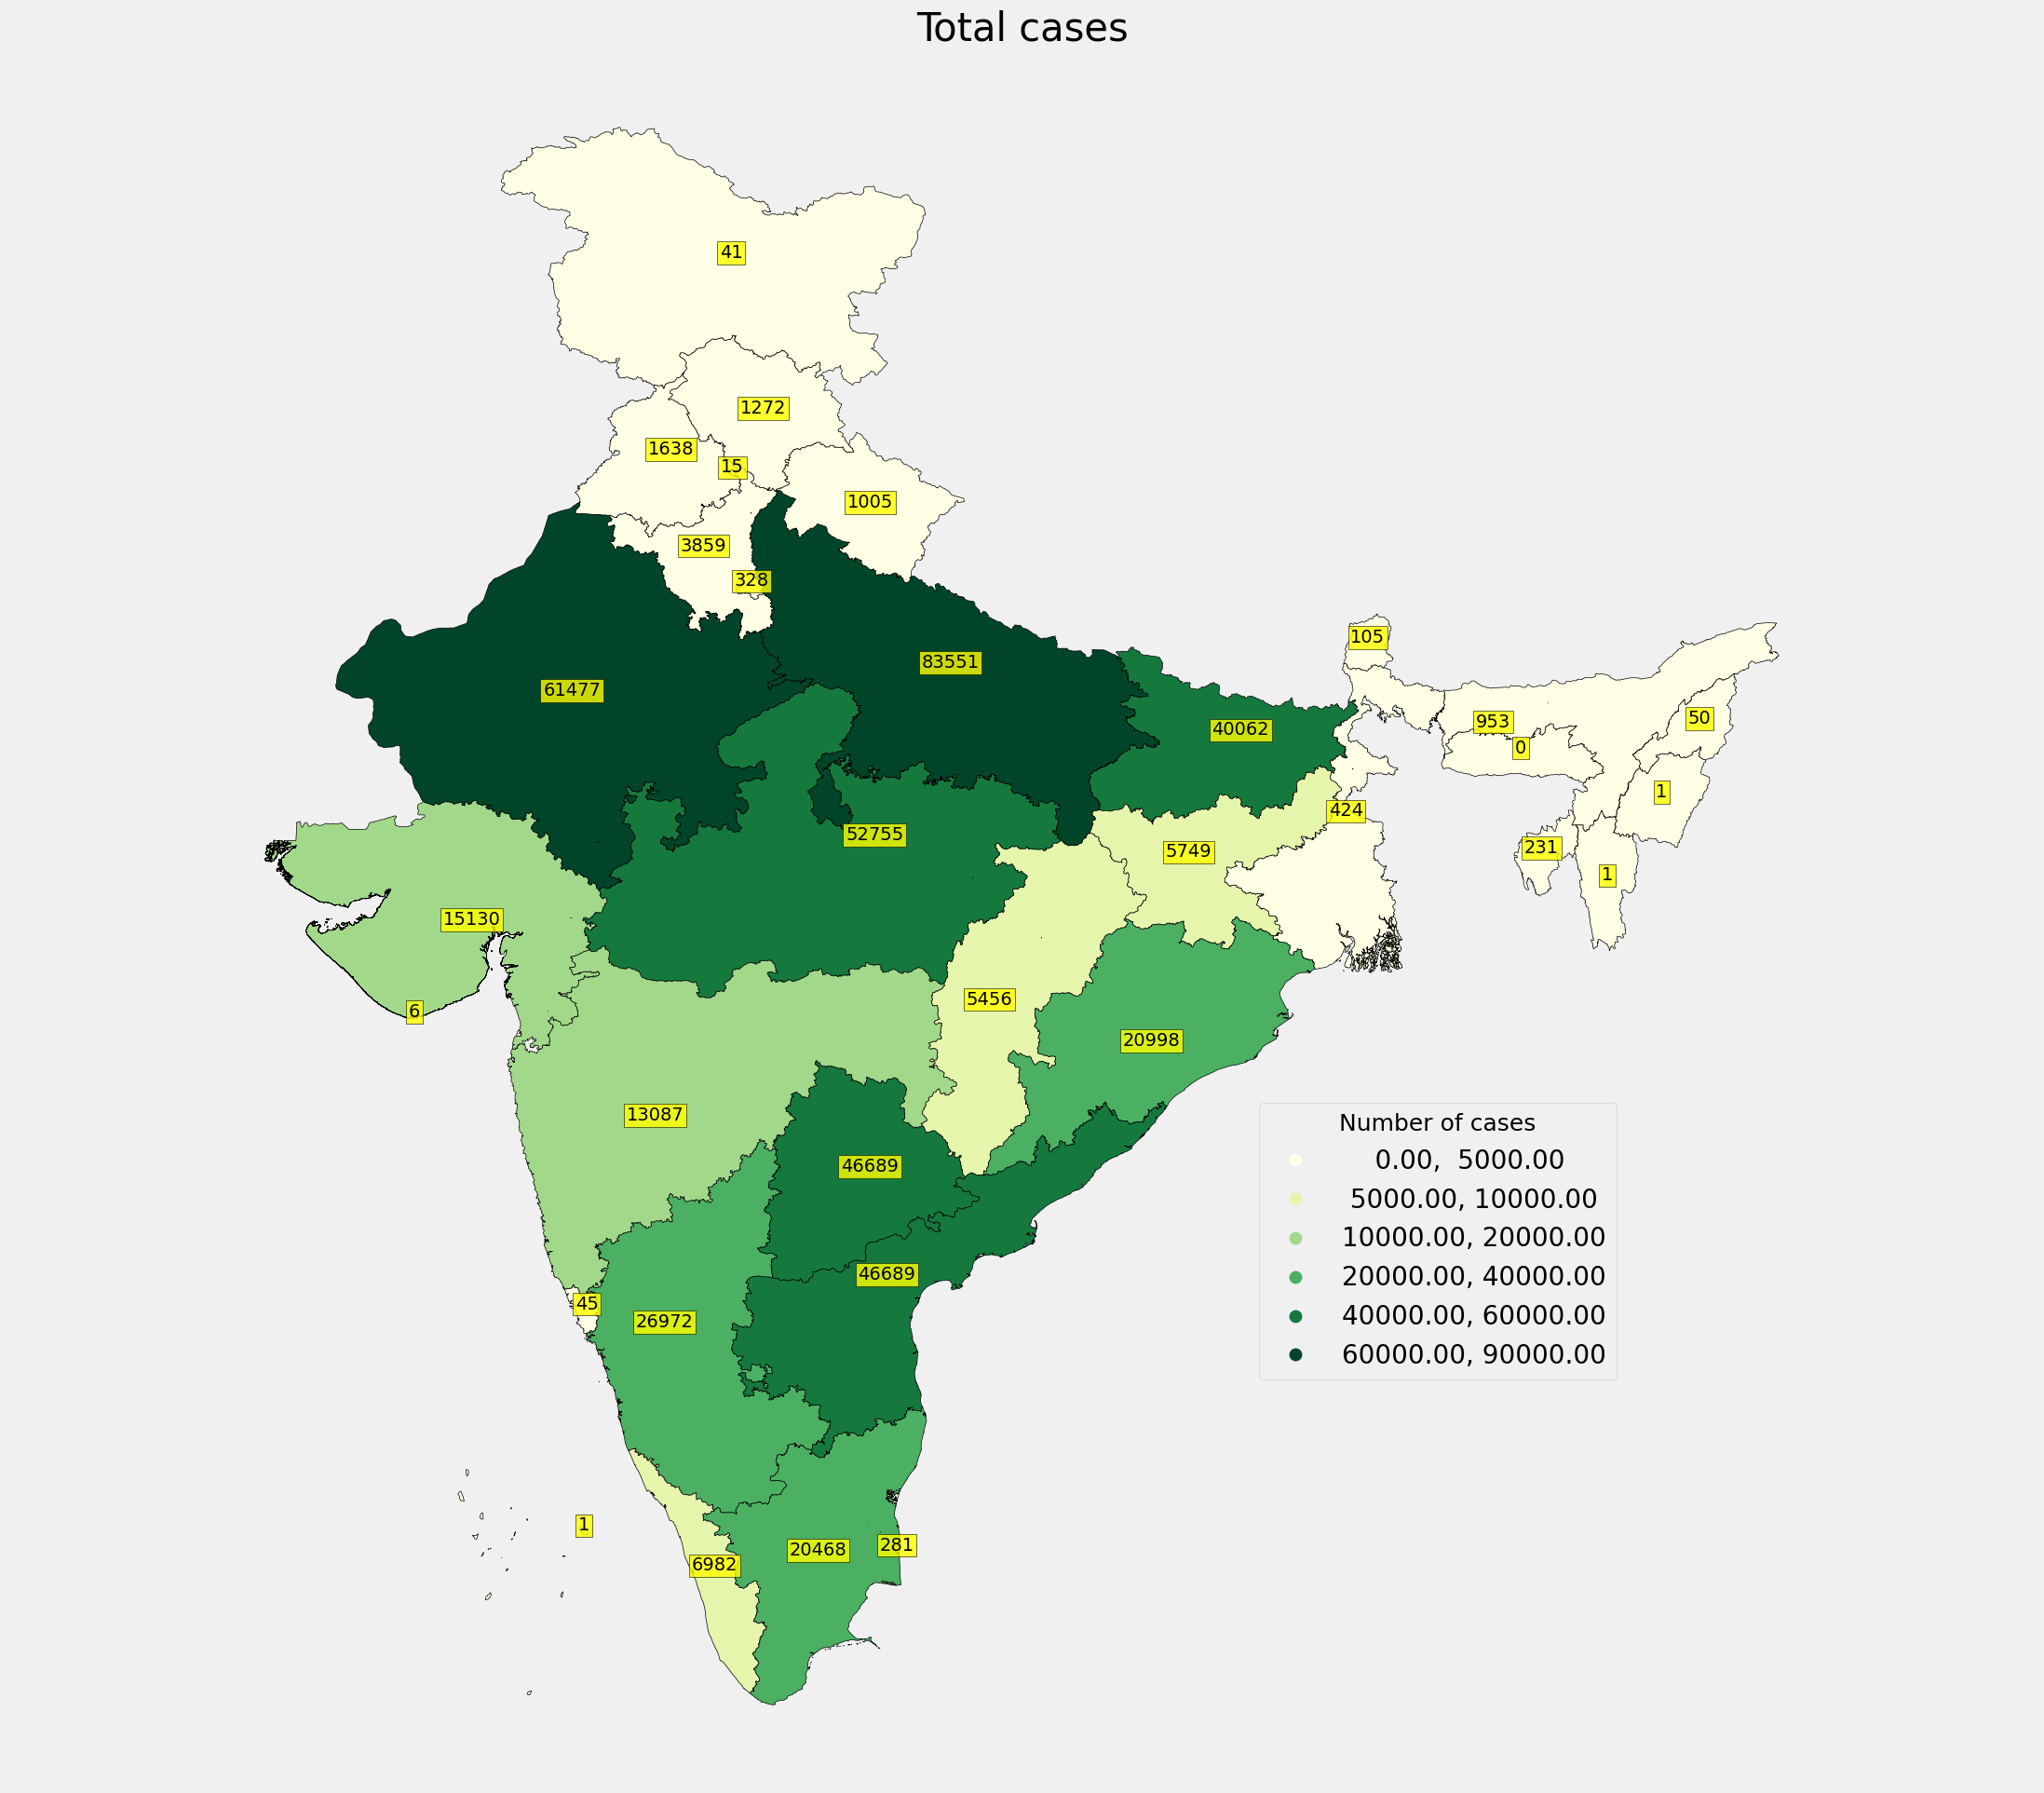

In [ ]:
import pysal.viz.mapclassify
import mapclassify
import matplotlib.pyplot as plt
figsize = (25, 23)
merged1['coords'] = merged1['geometry'].apply(lambda x: x.representative_point().coords[:])
merged1['coords'] = [coords[0] for coords in merged1['coords']]
colors = 8

import pylab as plot
params = {'legend.fontsize': 20,
          'legend.handlelength': 2}
plot.rcParams.update(params)

ax= merged1.dropna().plot(column= 'sum', figsize=figsize, scheme= 'User_Defined',cmap = 'YlGn',edgecolor='black',k = colors,legend = True, classification_kwds=dict(bins=[5000,10000,20000,40000,60000,90000]) )
ax.set_title(" Total Cases", size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['sum'], horizontalalignment='center', bbox={'facecolor': 'yellow', 'alpha':0.8, 'pad': 2, 'edgecolor':'black'})

ax.get_legend().set_bbox_to_anchor((0.8, 0.4))
ax.get_legend().set_title('Number of cases')

ax.set_title("Total cases", size=30)
ax.axis('off')
leg = ax.get_legend()
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    parts = label_text.split()
    if len(parts) >= 3:
        lower = parts[0]
        upper = parts[2]
        new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
        lbl.set_text(new_text)

plt.axis('equal')
plt.show()

NameError: ignored

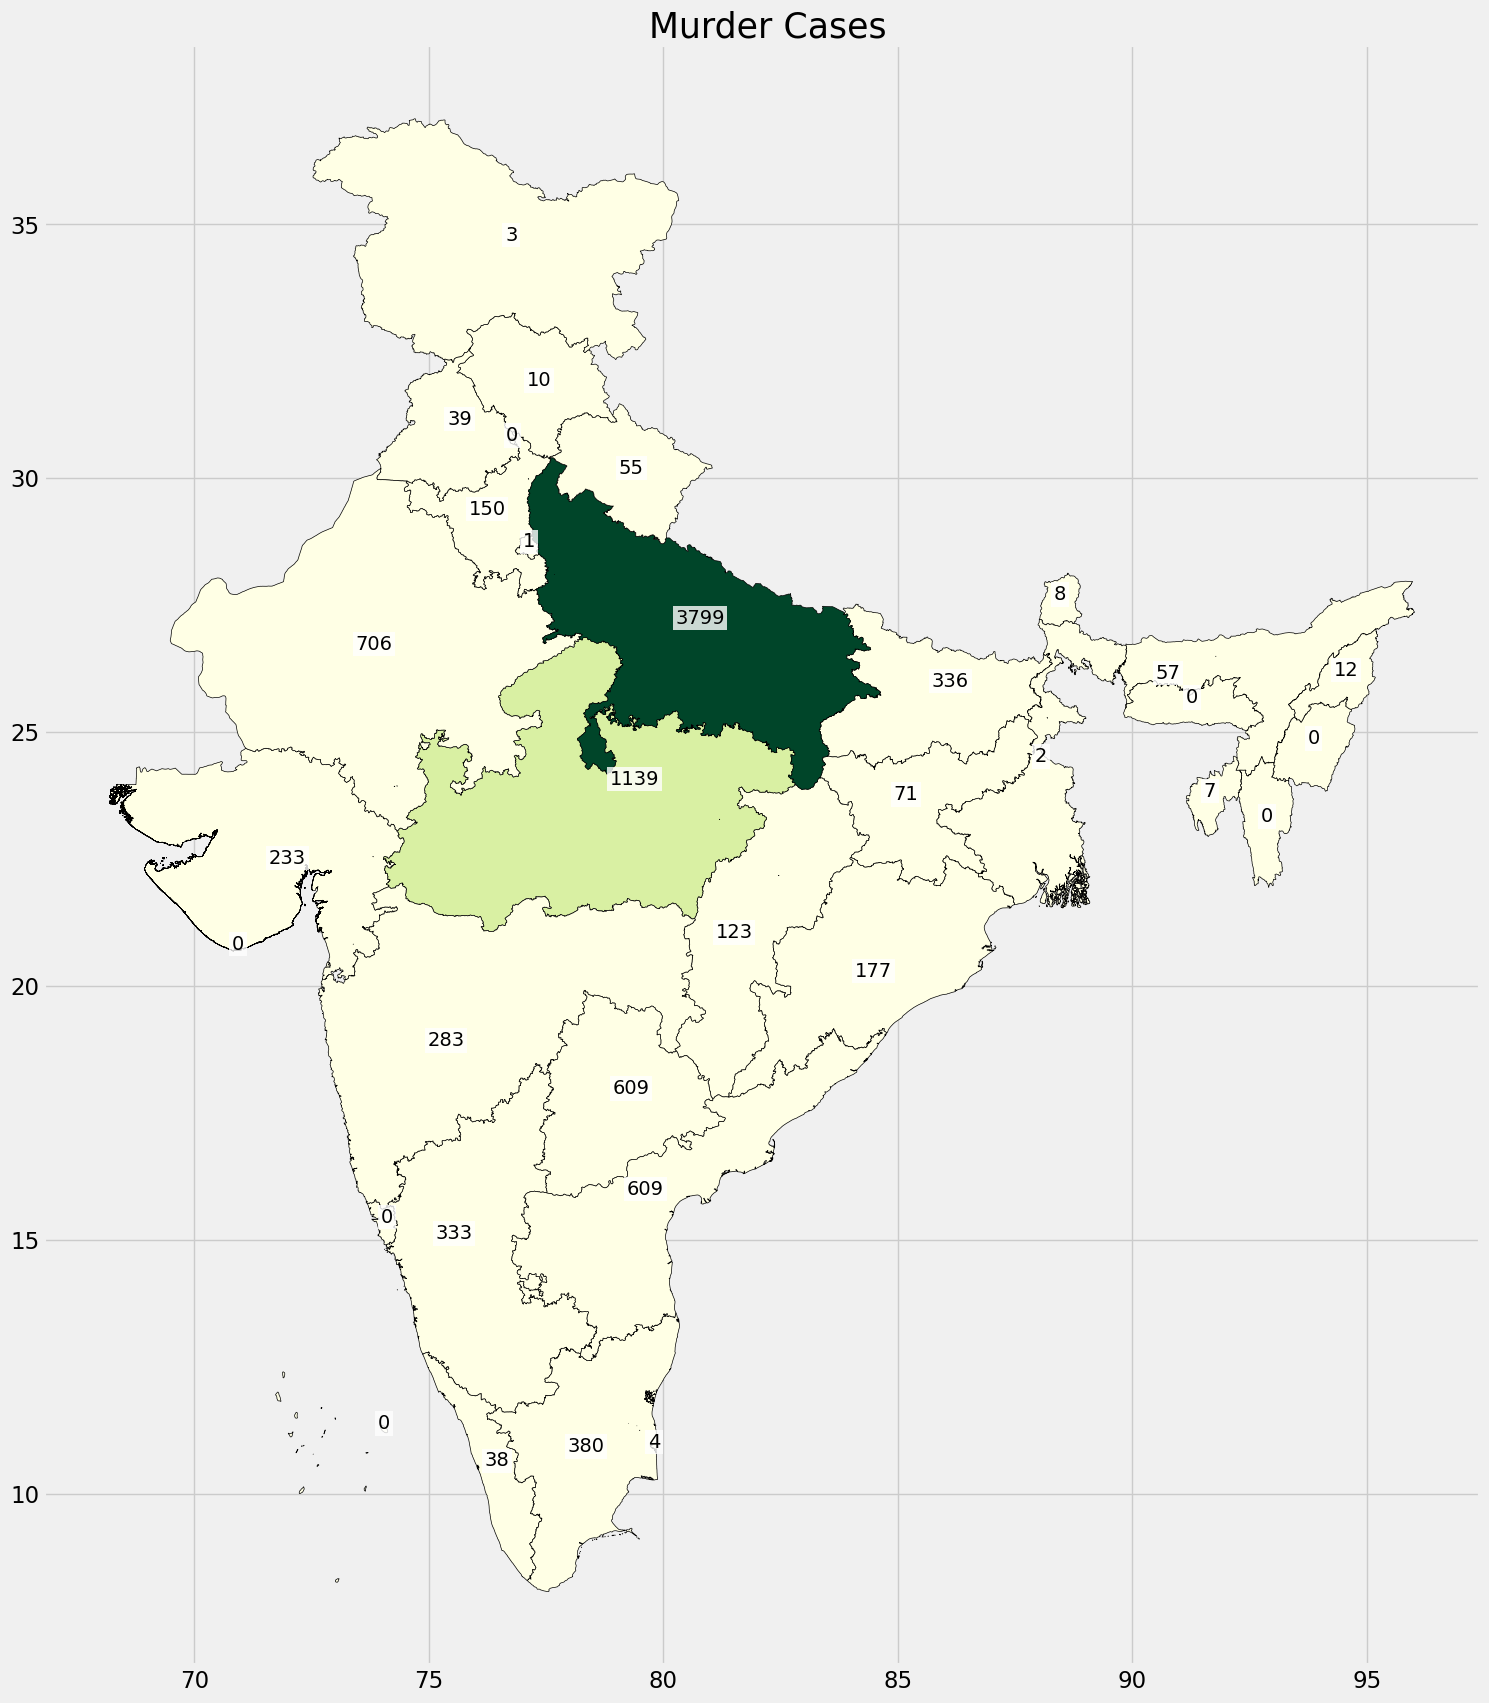

In [ ]:
from matplotlib.colors import Normalize
from matplotlib import cm
figsize = (25, 20)

cmap = 'YlGn'
ax= merged1.dropna().plot(column= 'Murder', cmap= cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title(" Murder Cases", size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Murder'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = matplotlib.colors.Normalize(vmin=merged1['Murder'].min(), vmax= merged1['Murder'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

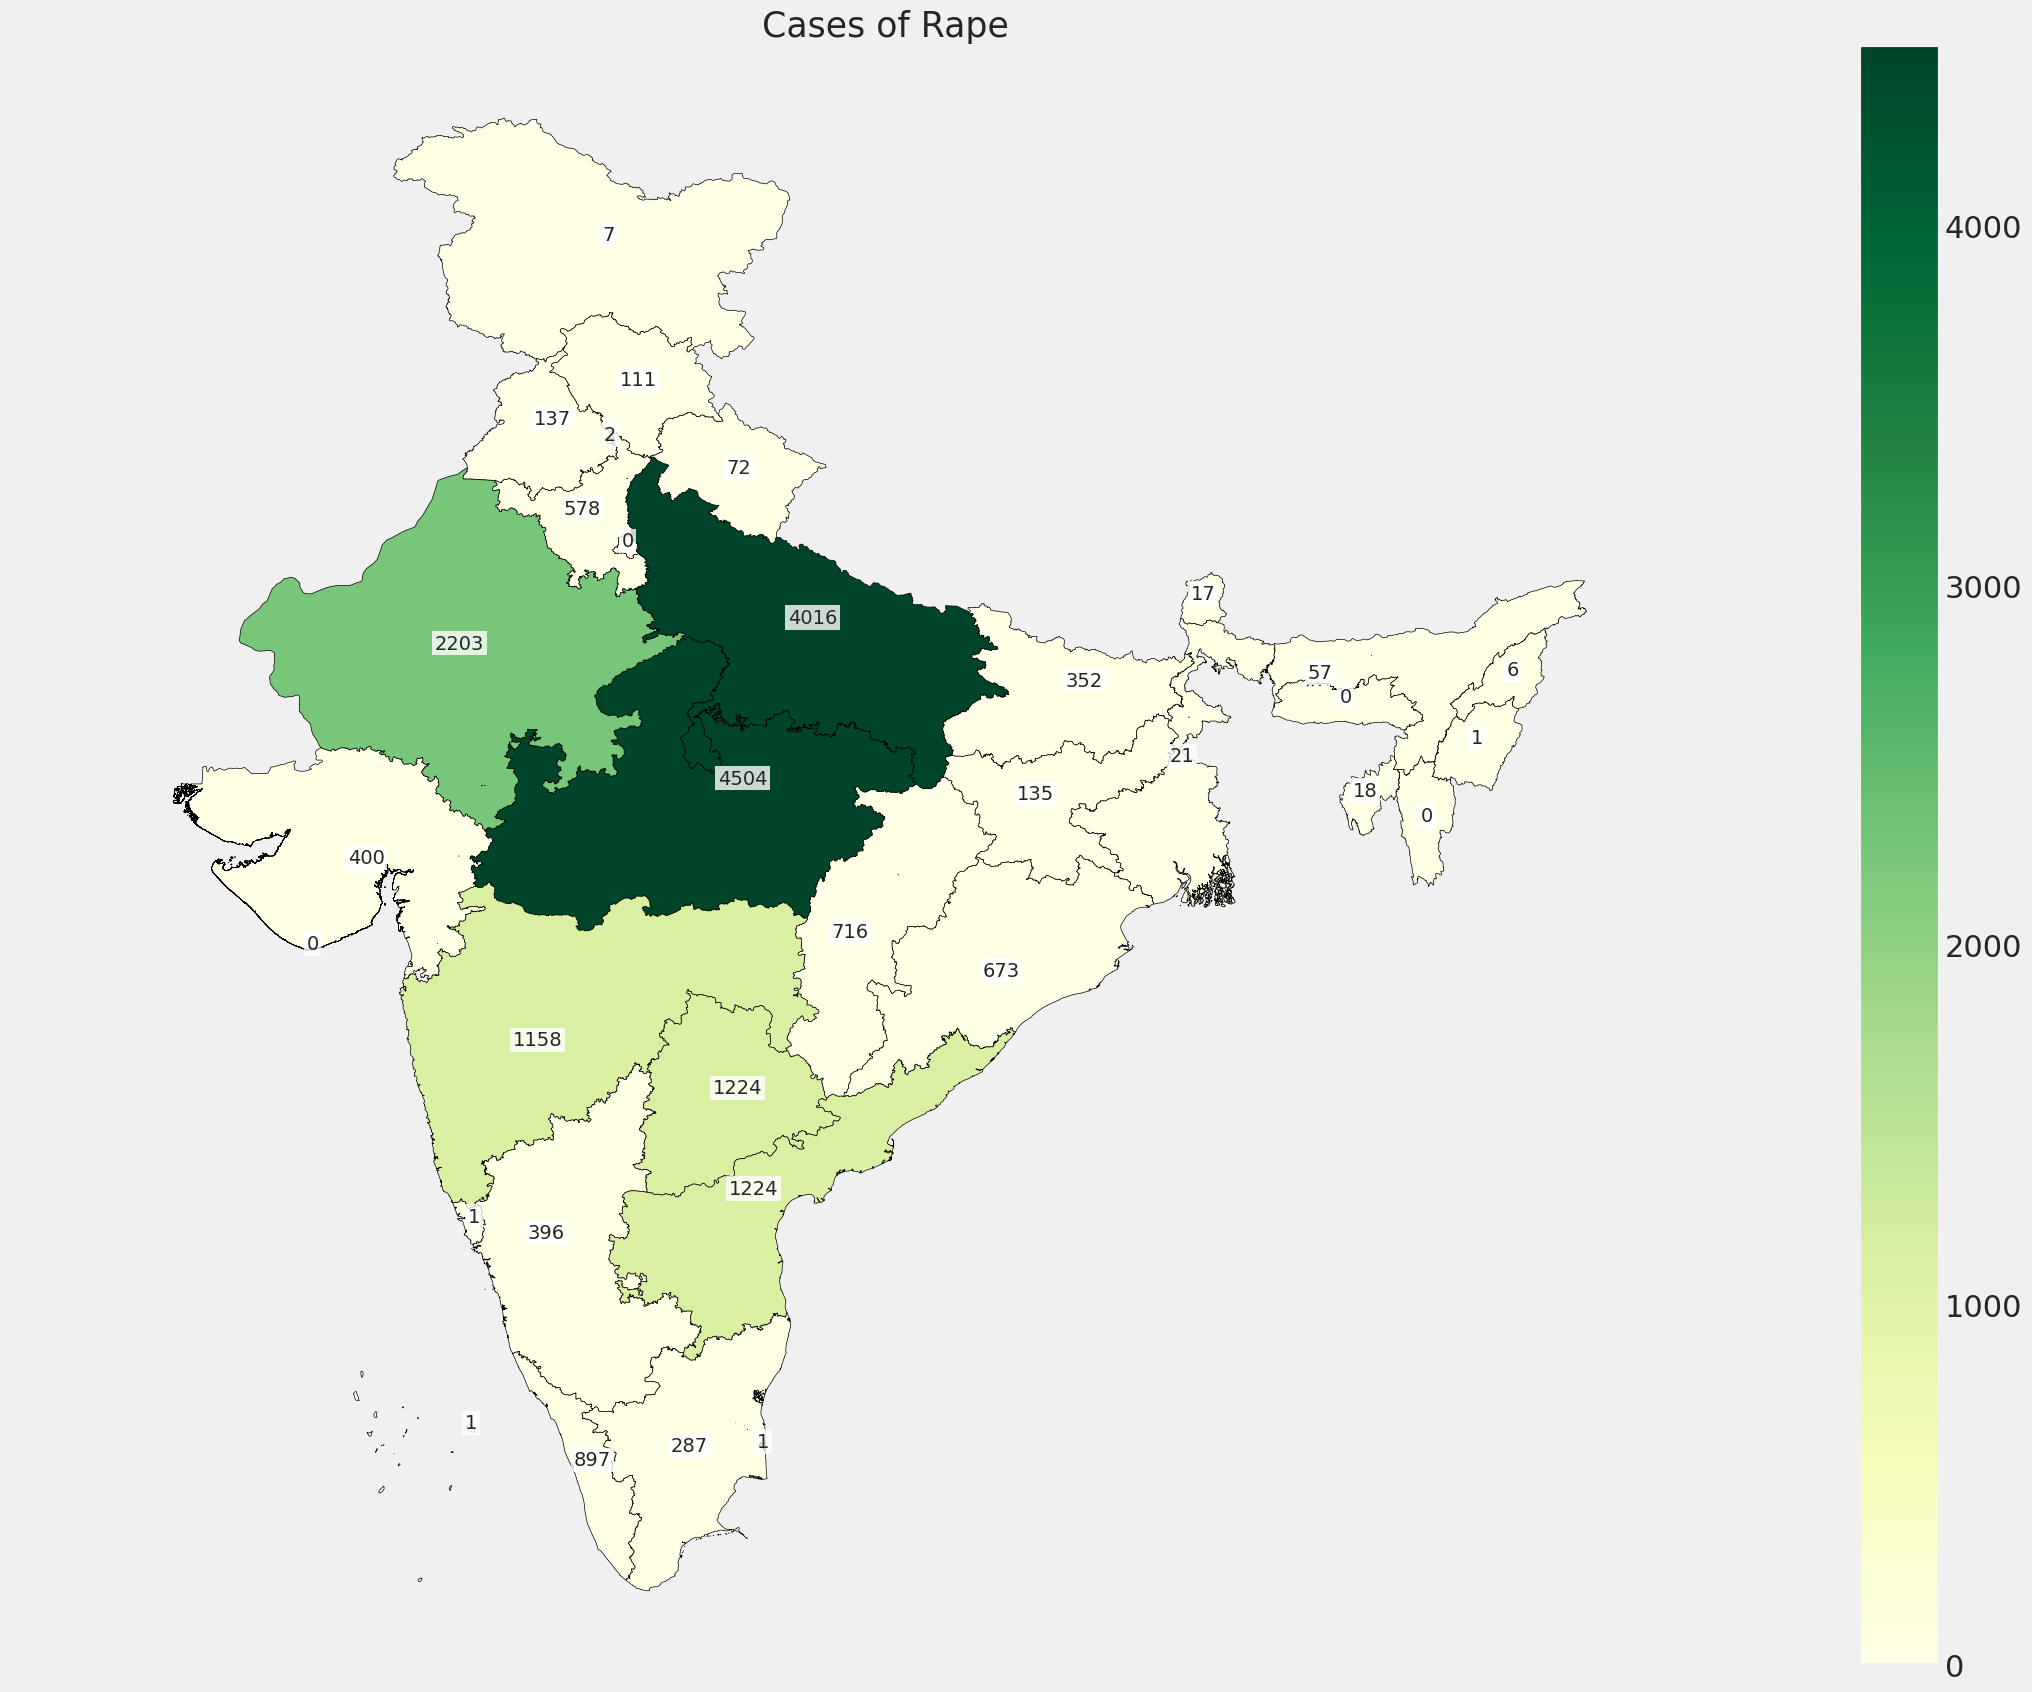

In [ ]:
from matplotlib.colors import Normalize
from matplotlib import cm

sns.set_context("poster")
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

figsize = (25, 20)


ax= merged1.dropna().plot(column= 'Rape', cmap= cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title(" Cases of Rape", size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Rape'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = Normalize(vmin=merged1['Rape'].min(), vmax= merged1['Rape'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

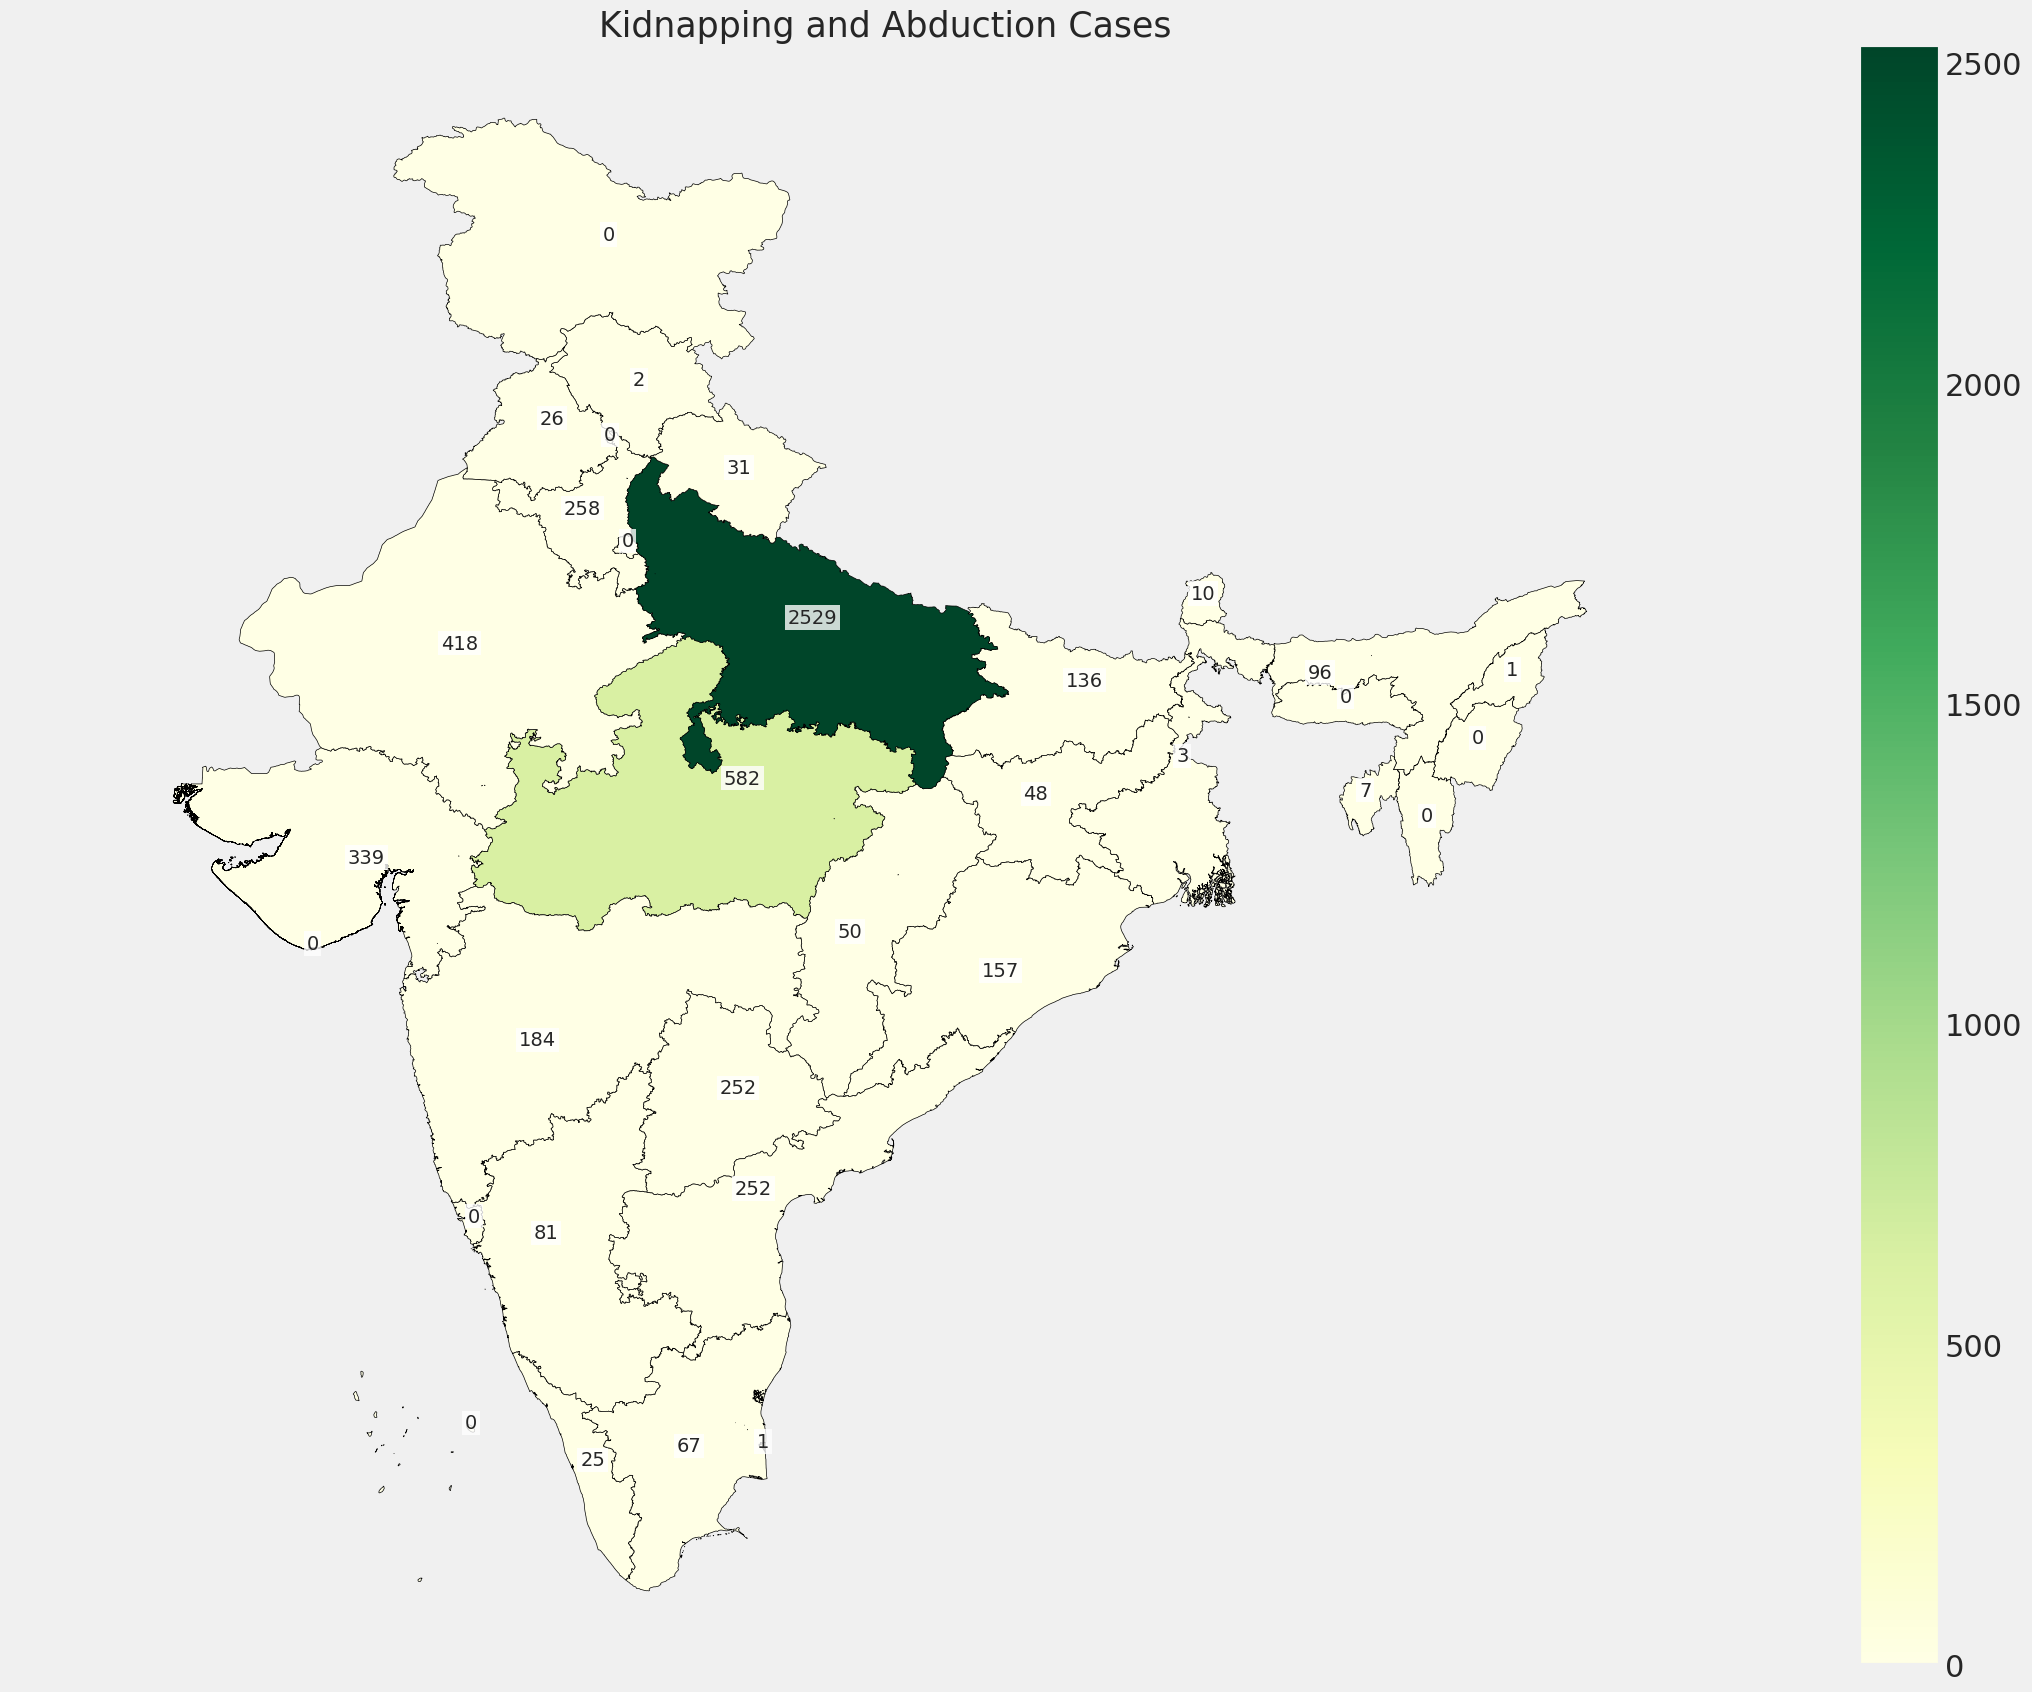

In [ ]:
figsize = (25, 20)


ax= merged1.dropna().plot(column= 'Kidnapping and Abduction', cmap= cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title(" Kidnapping and Abduction Cases" , size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Kidnapping and Abduction'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = Normalize(vmin=merged1['Kidnapping and Abduction'].min(), vmax= merged1['Kidnapping and Abduction'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

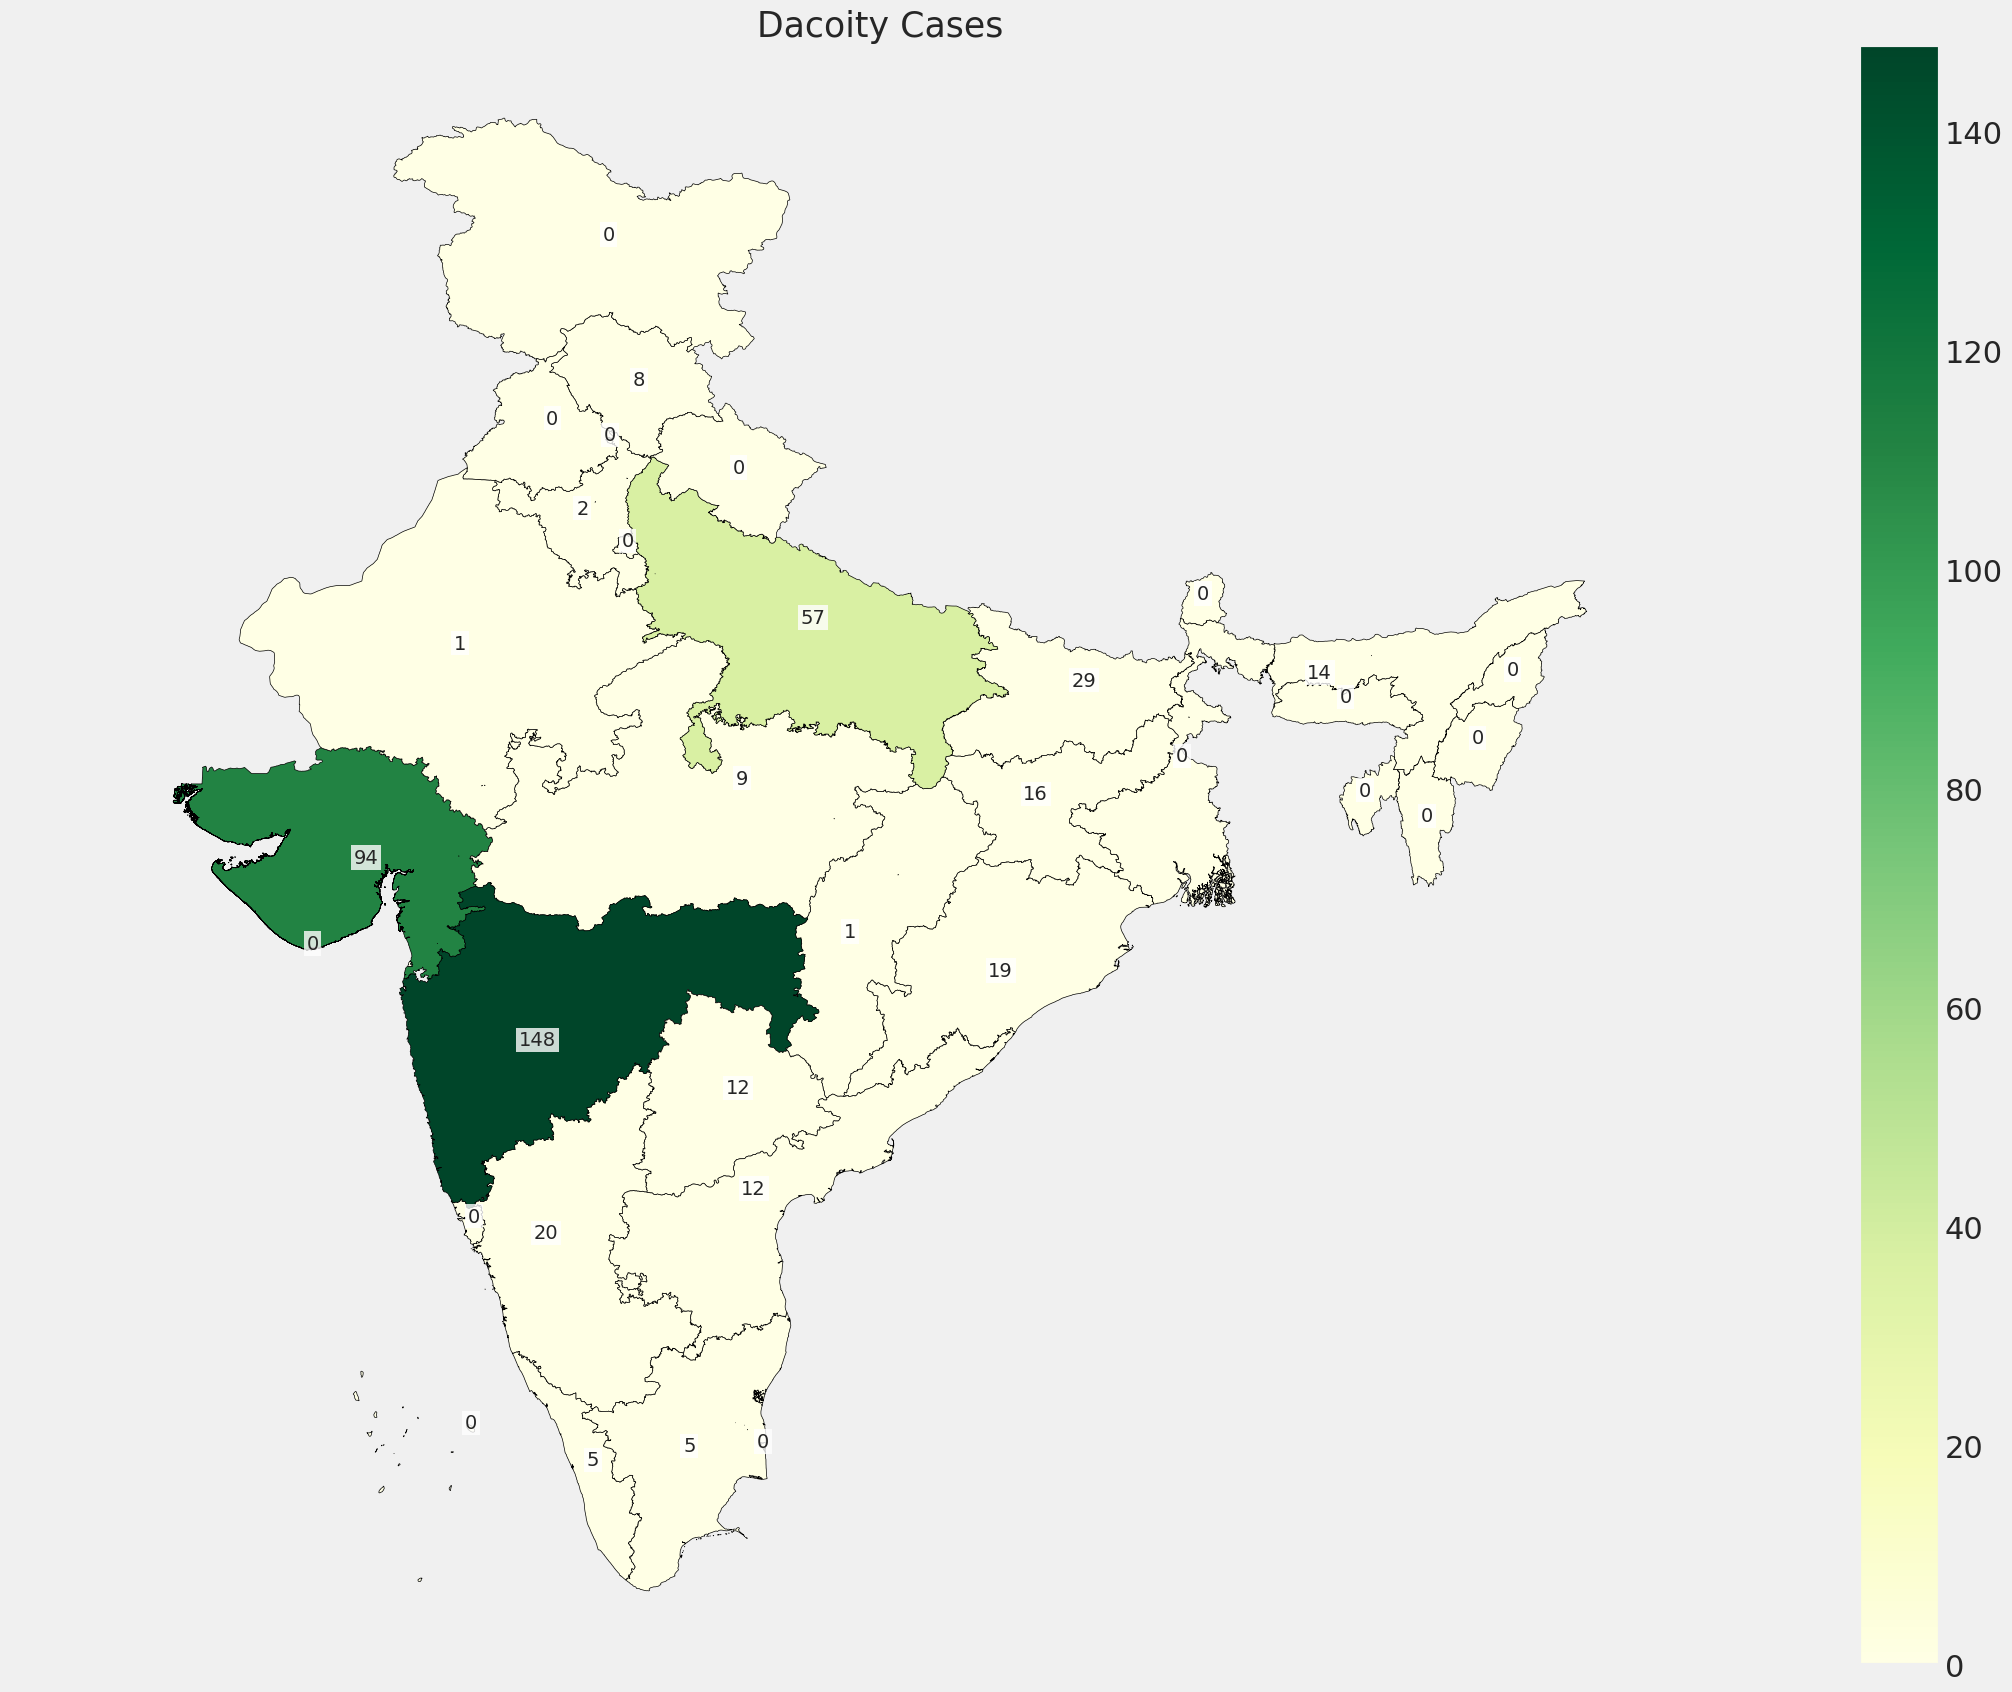

In [ ]:
figsize = (25, 20)


ax= merged1.dropna().plot(column= 'Dacoity', cmap=cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title("Dacoity Cases", size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Dacoity'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = Normalize(vmin=merged1['Dacoity'].min(), vmax= merged1['Dacoity'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()


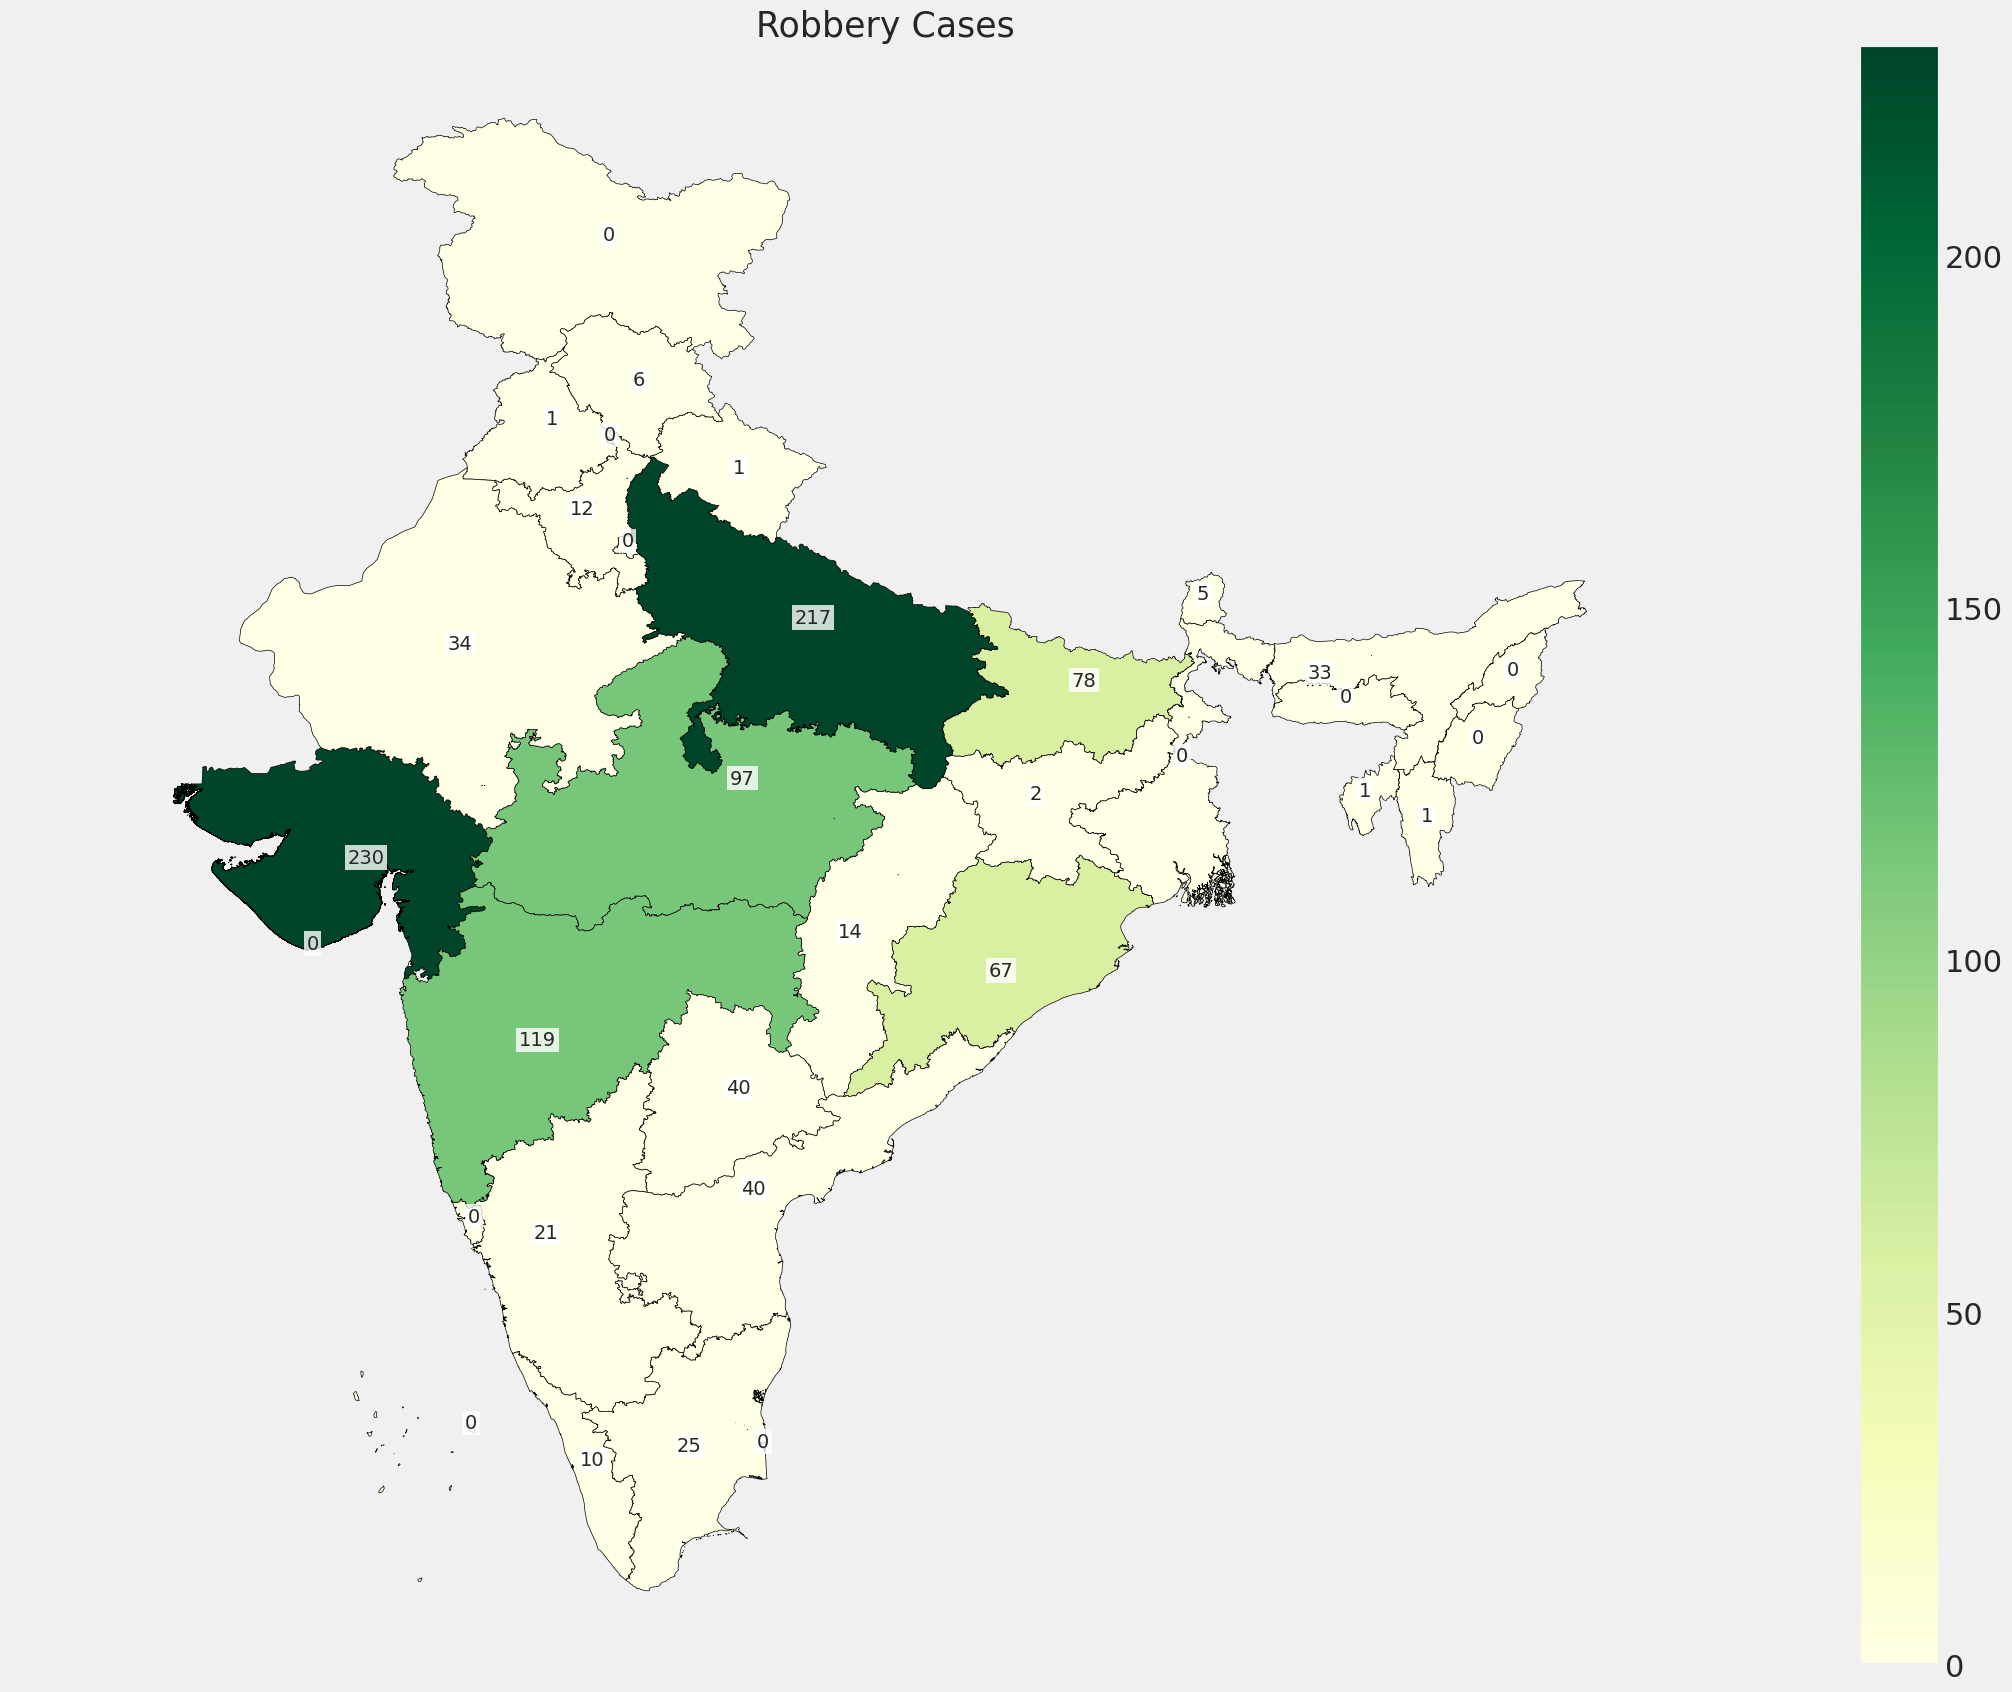

In [ ]:
figsize = (25, 20)


ax= merged1.dropna().plot(column= 'Robbery', cmap=cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title(" Robbery Cases", size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Robbery'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = Normalize(vmin=merged1['Robbery'].min(), vmax= merged1['Robbery'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

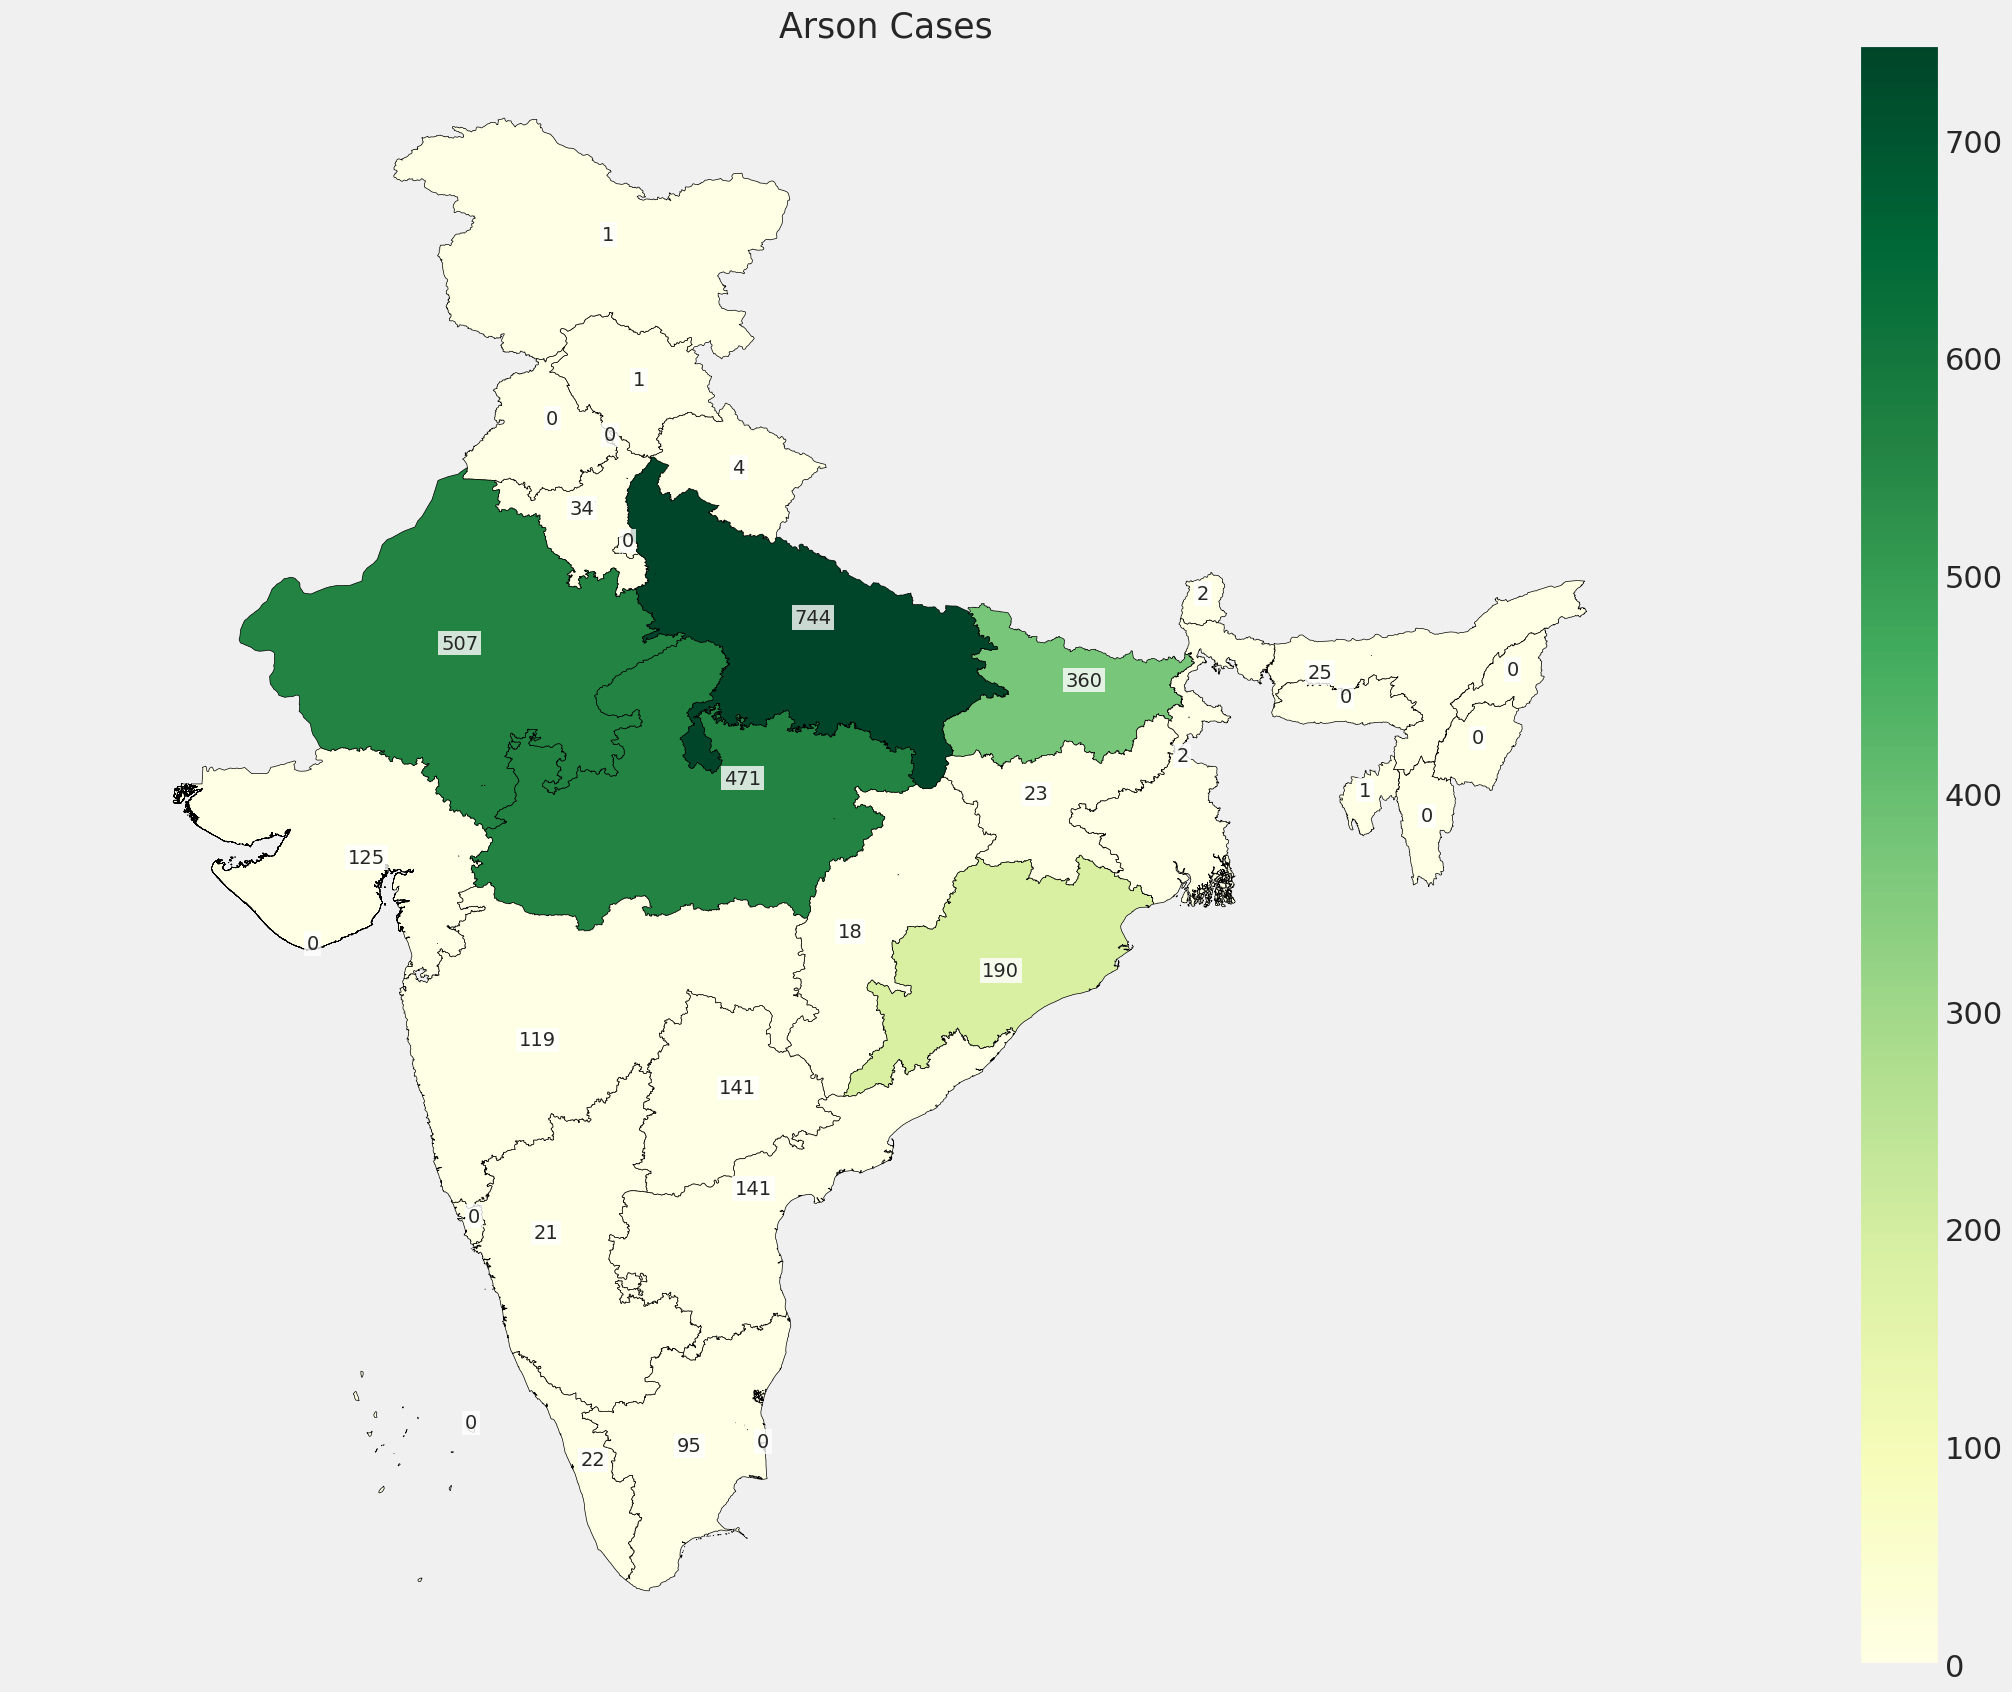

In [ ]:
figsize = (25, 20)


ax= merged1.dropna().plot(column= 'Arson', cmap=cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title(" Arson Cases", size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Arson'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = Normalize(vmin=merged1['Arson'].min(), vmax= merged1['Arson'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

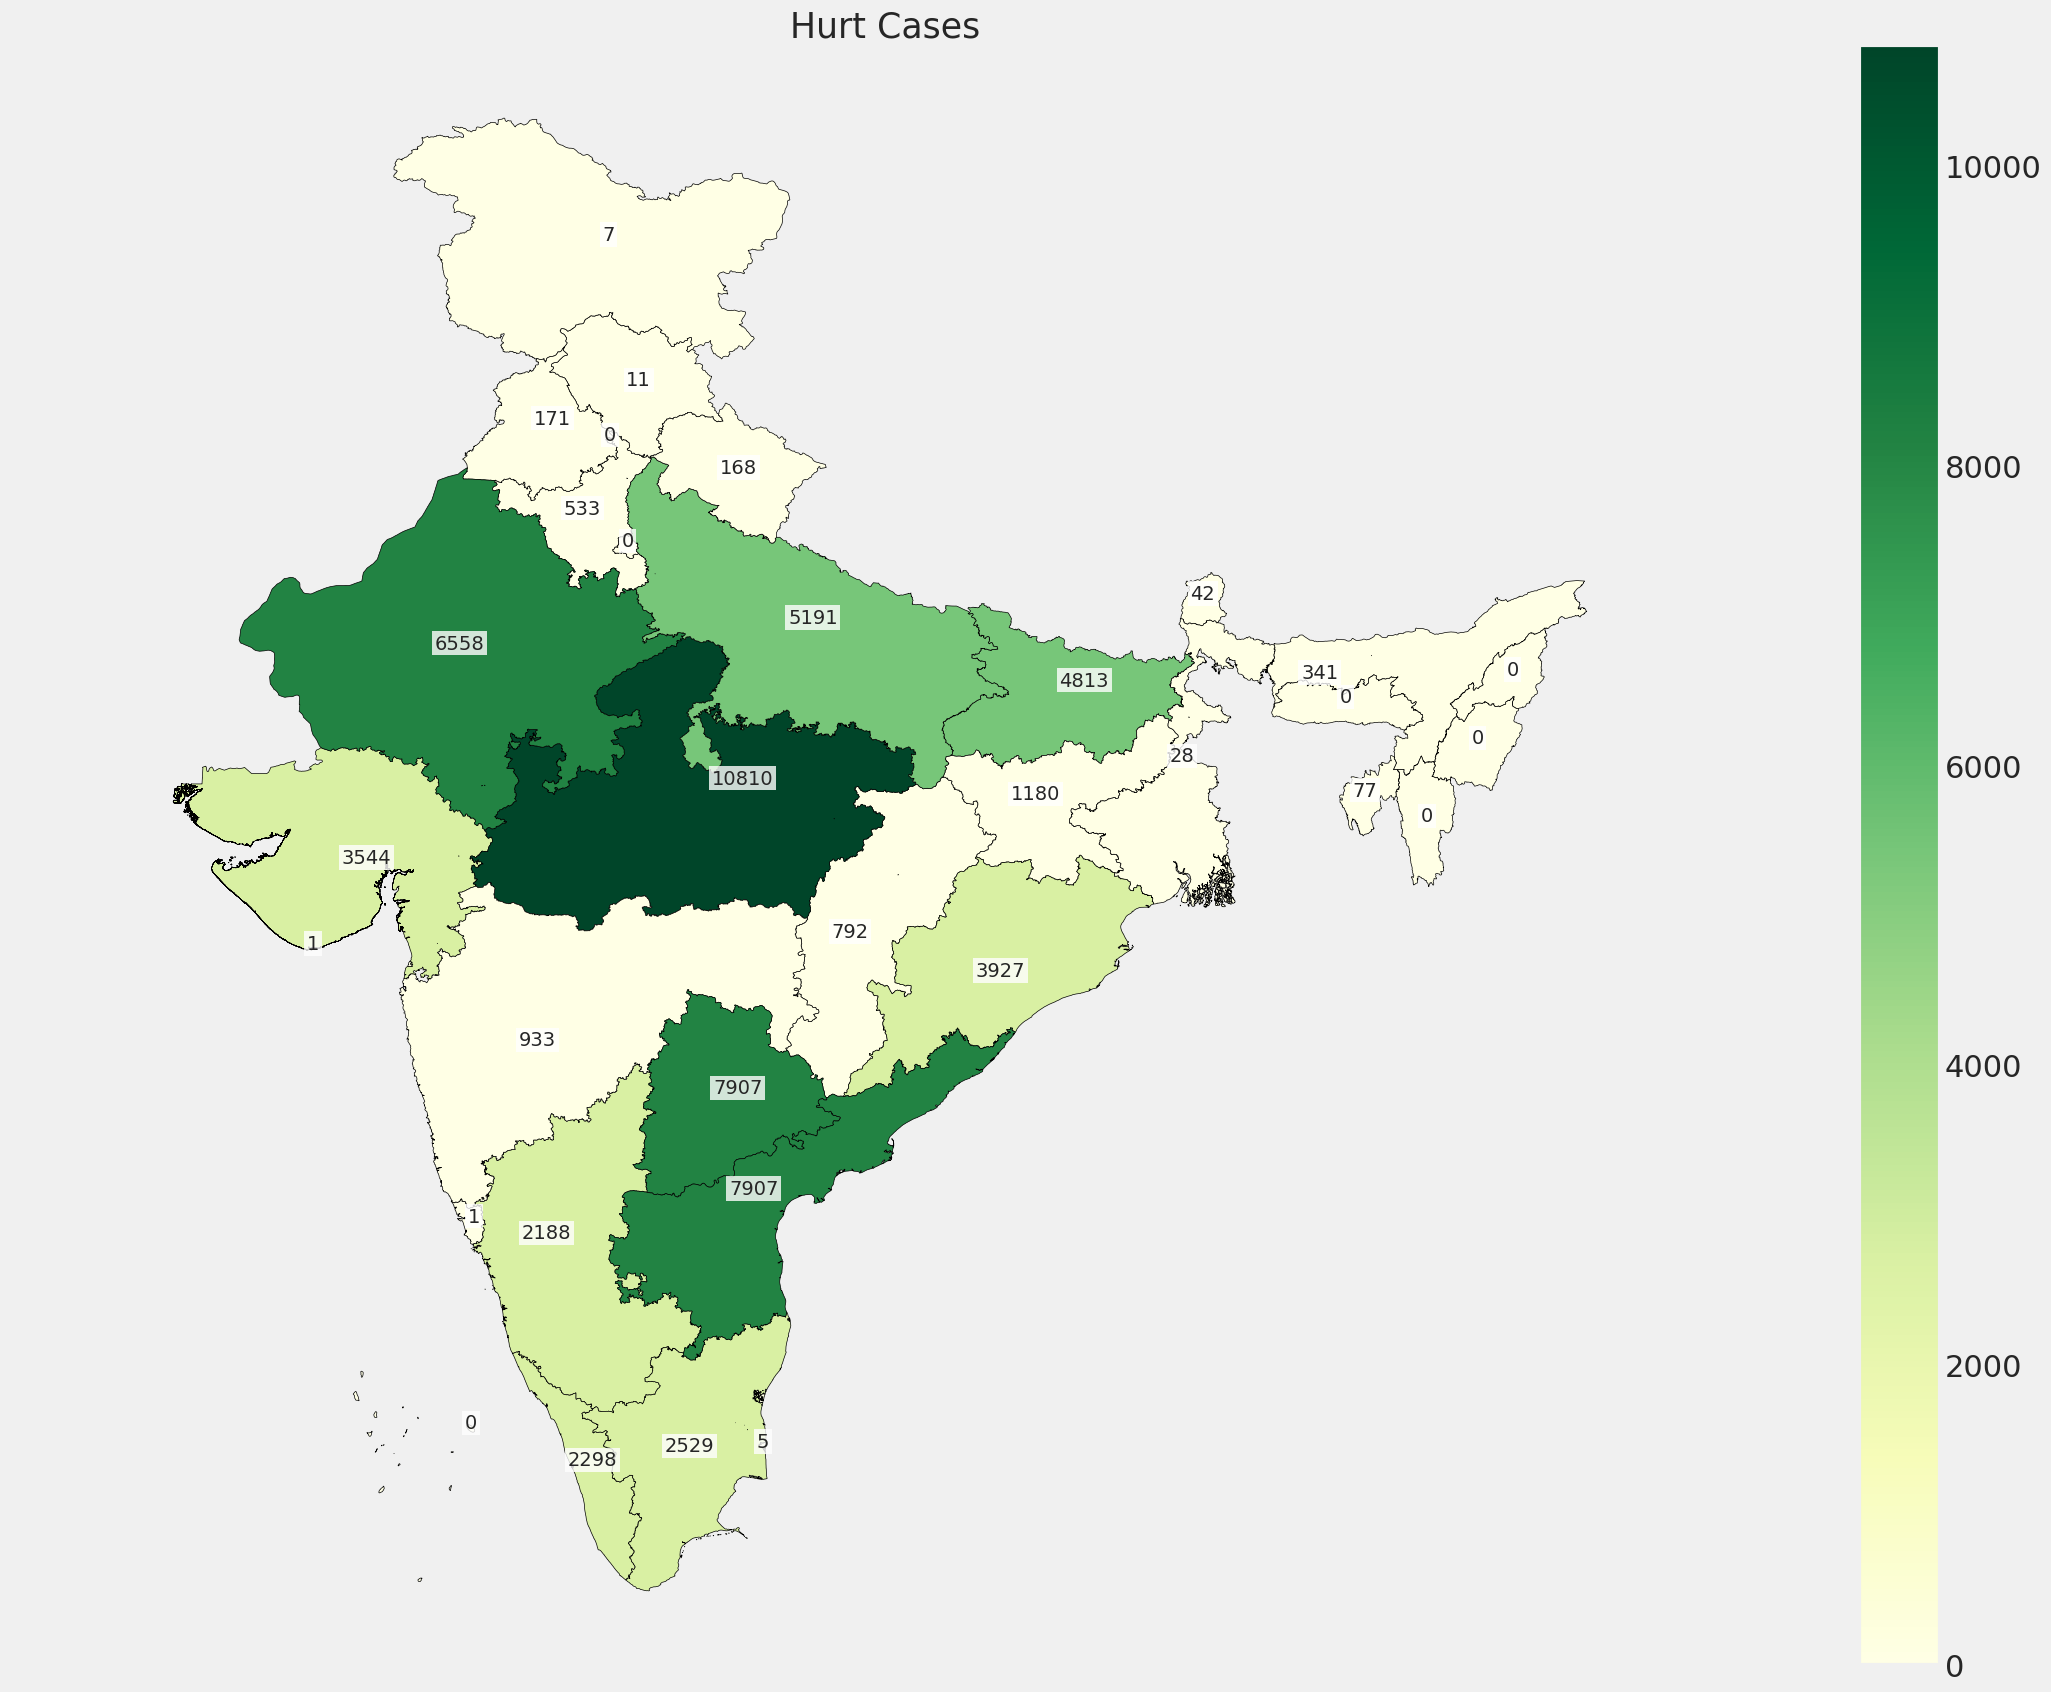

In [ ]:
figsize = (25, 20)
plt.style.use("fivethirtyeight")
cmap1 = 'cool'
ax= merged1.dropna().plot(column= 'Hurt', cmap=cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title(" Hurt Cases" , size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Hurt'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = Normalize(vmin=merged1['Hurt'].min(), vmax= merged1['Hurt'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()


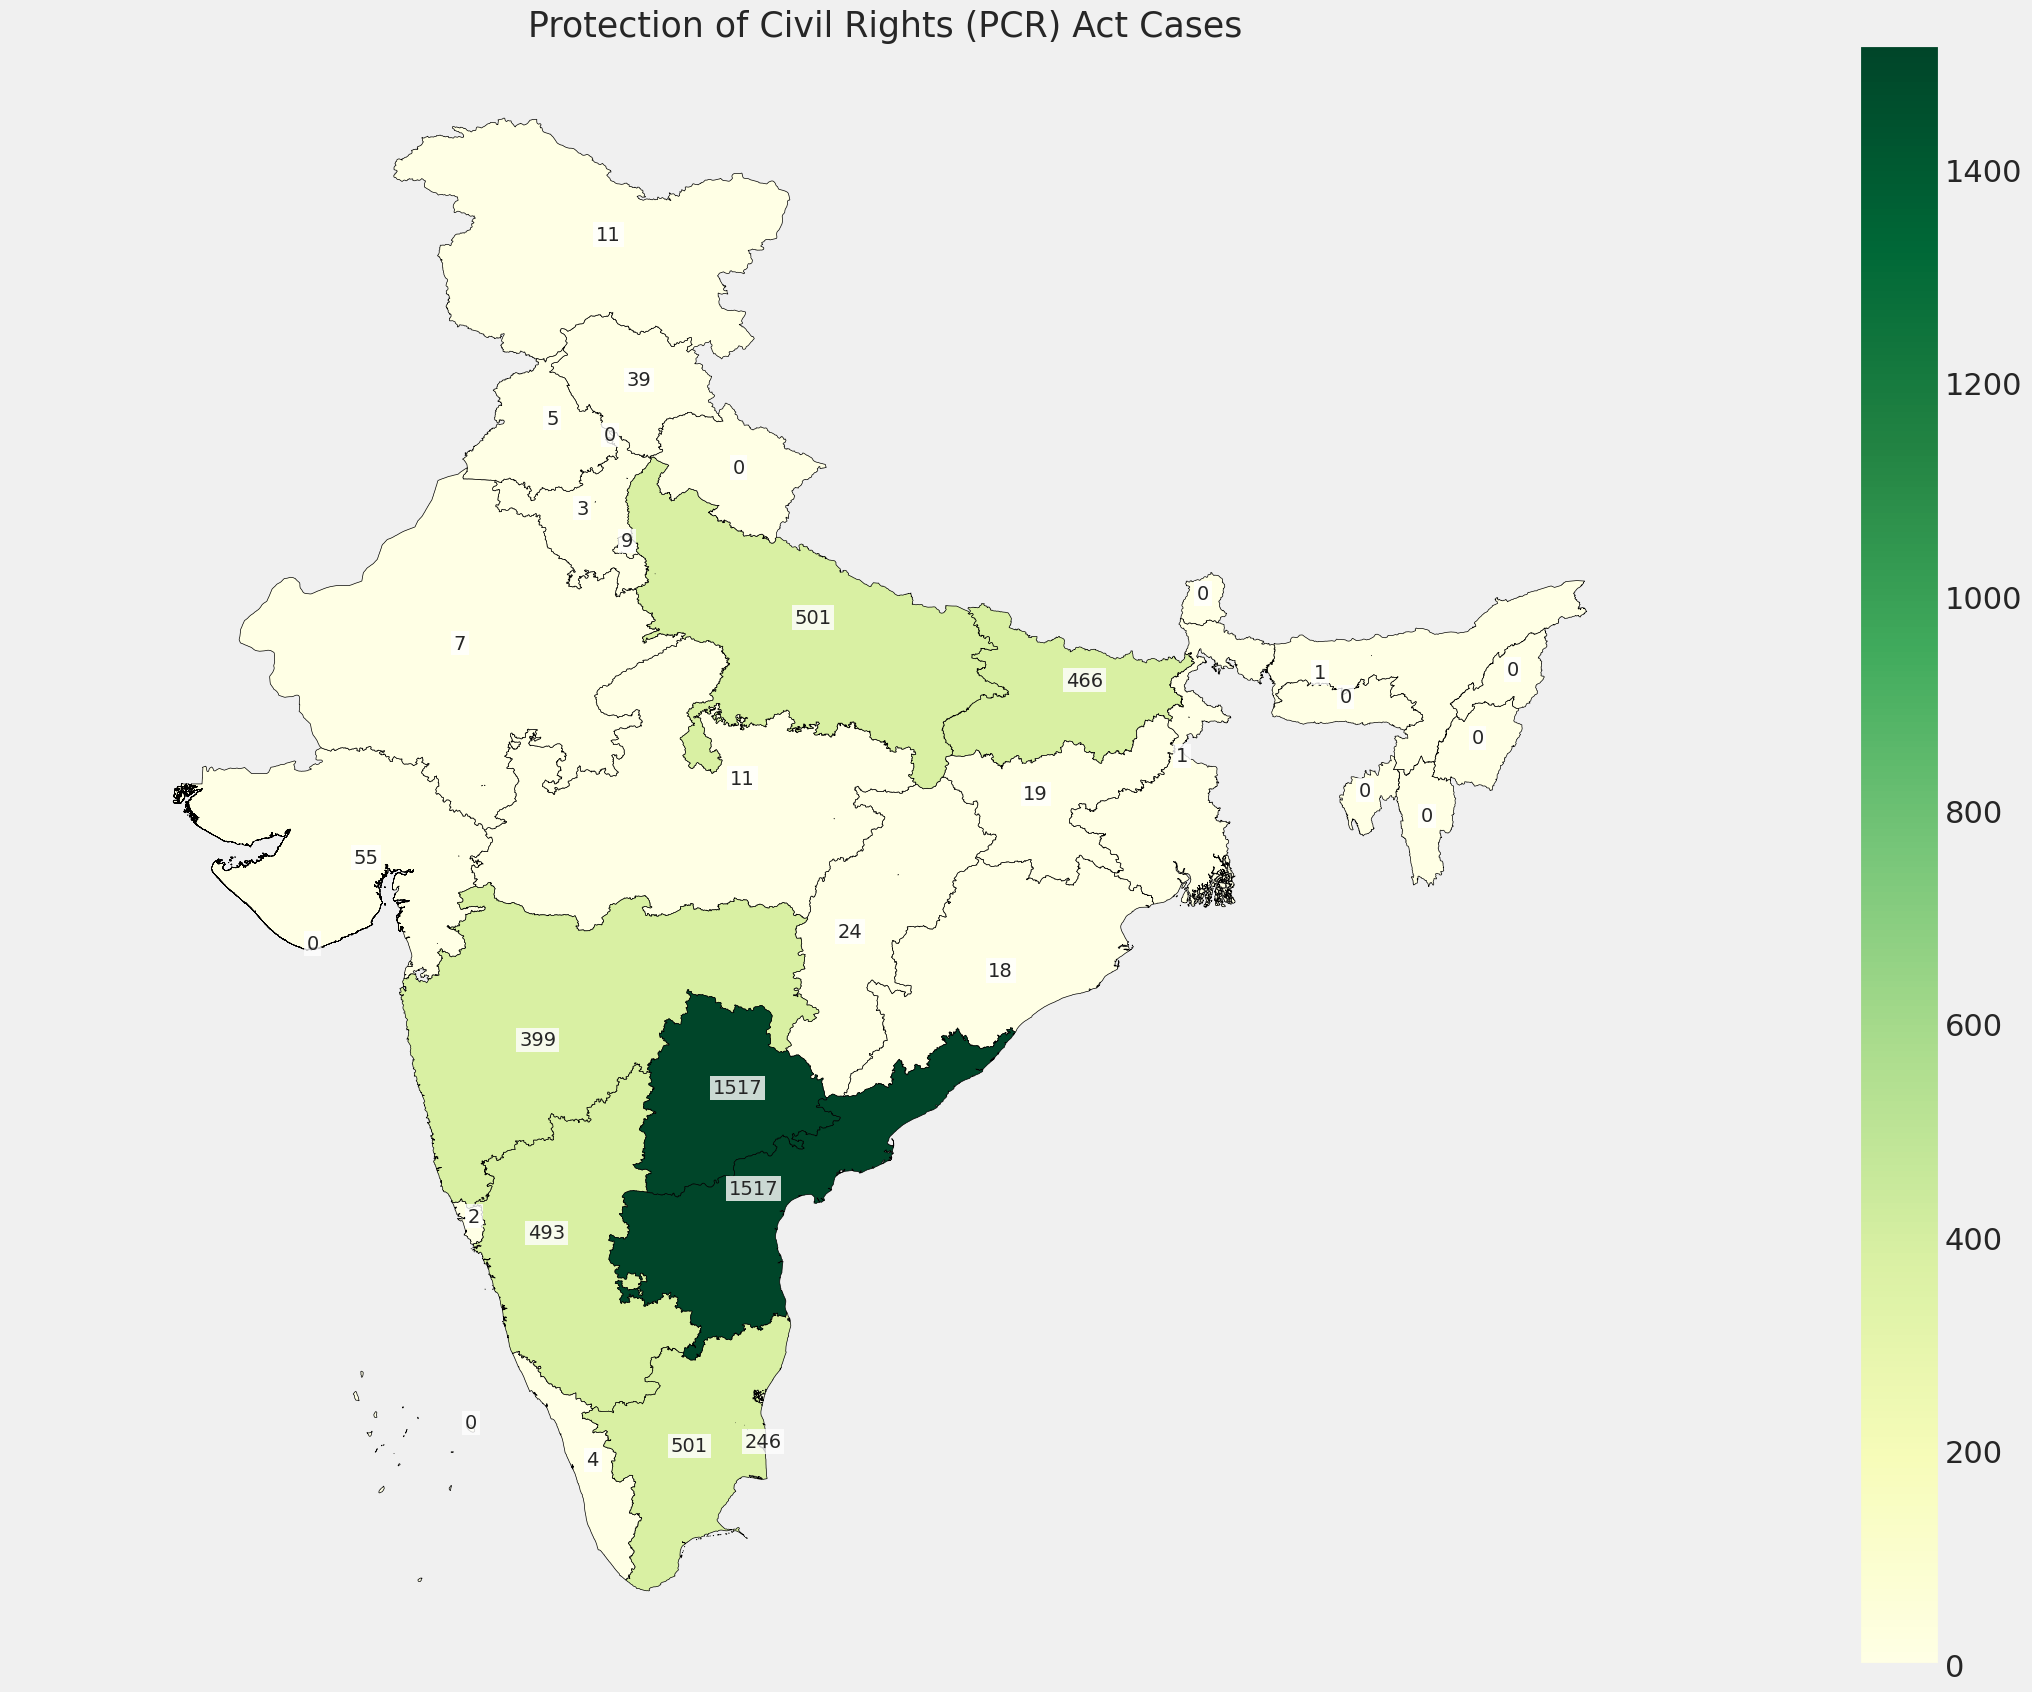

In [ ]:
figsize = (25, 20)


ax= merged1.dropna().plot(column= 'Protection of Civil Rights (PCR) Act', cmap=cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')
ax.set_title(" Protection of Civil Rights (PCR) Act Cases" , size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Protection of Civil Rights (PCR) Act'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = Normalize(vmin=merged1['Protection of Civil Rights (PCR) Act'].min(), vmax= merged1['Protection of Civil Rights (PCR) Act'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

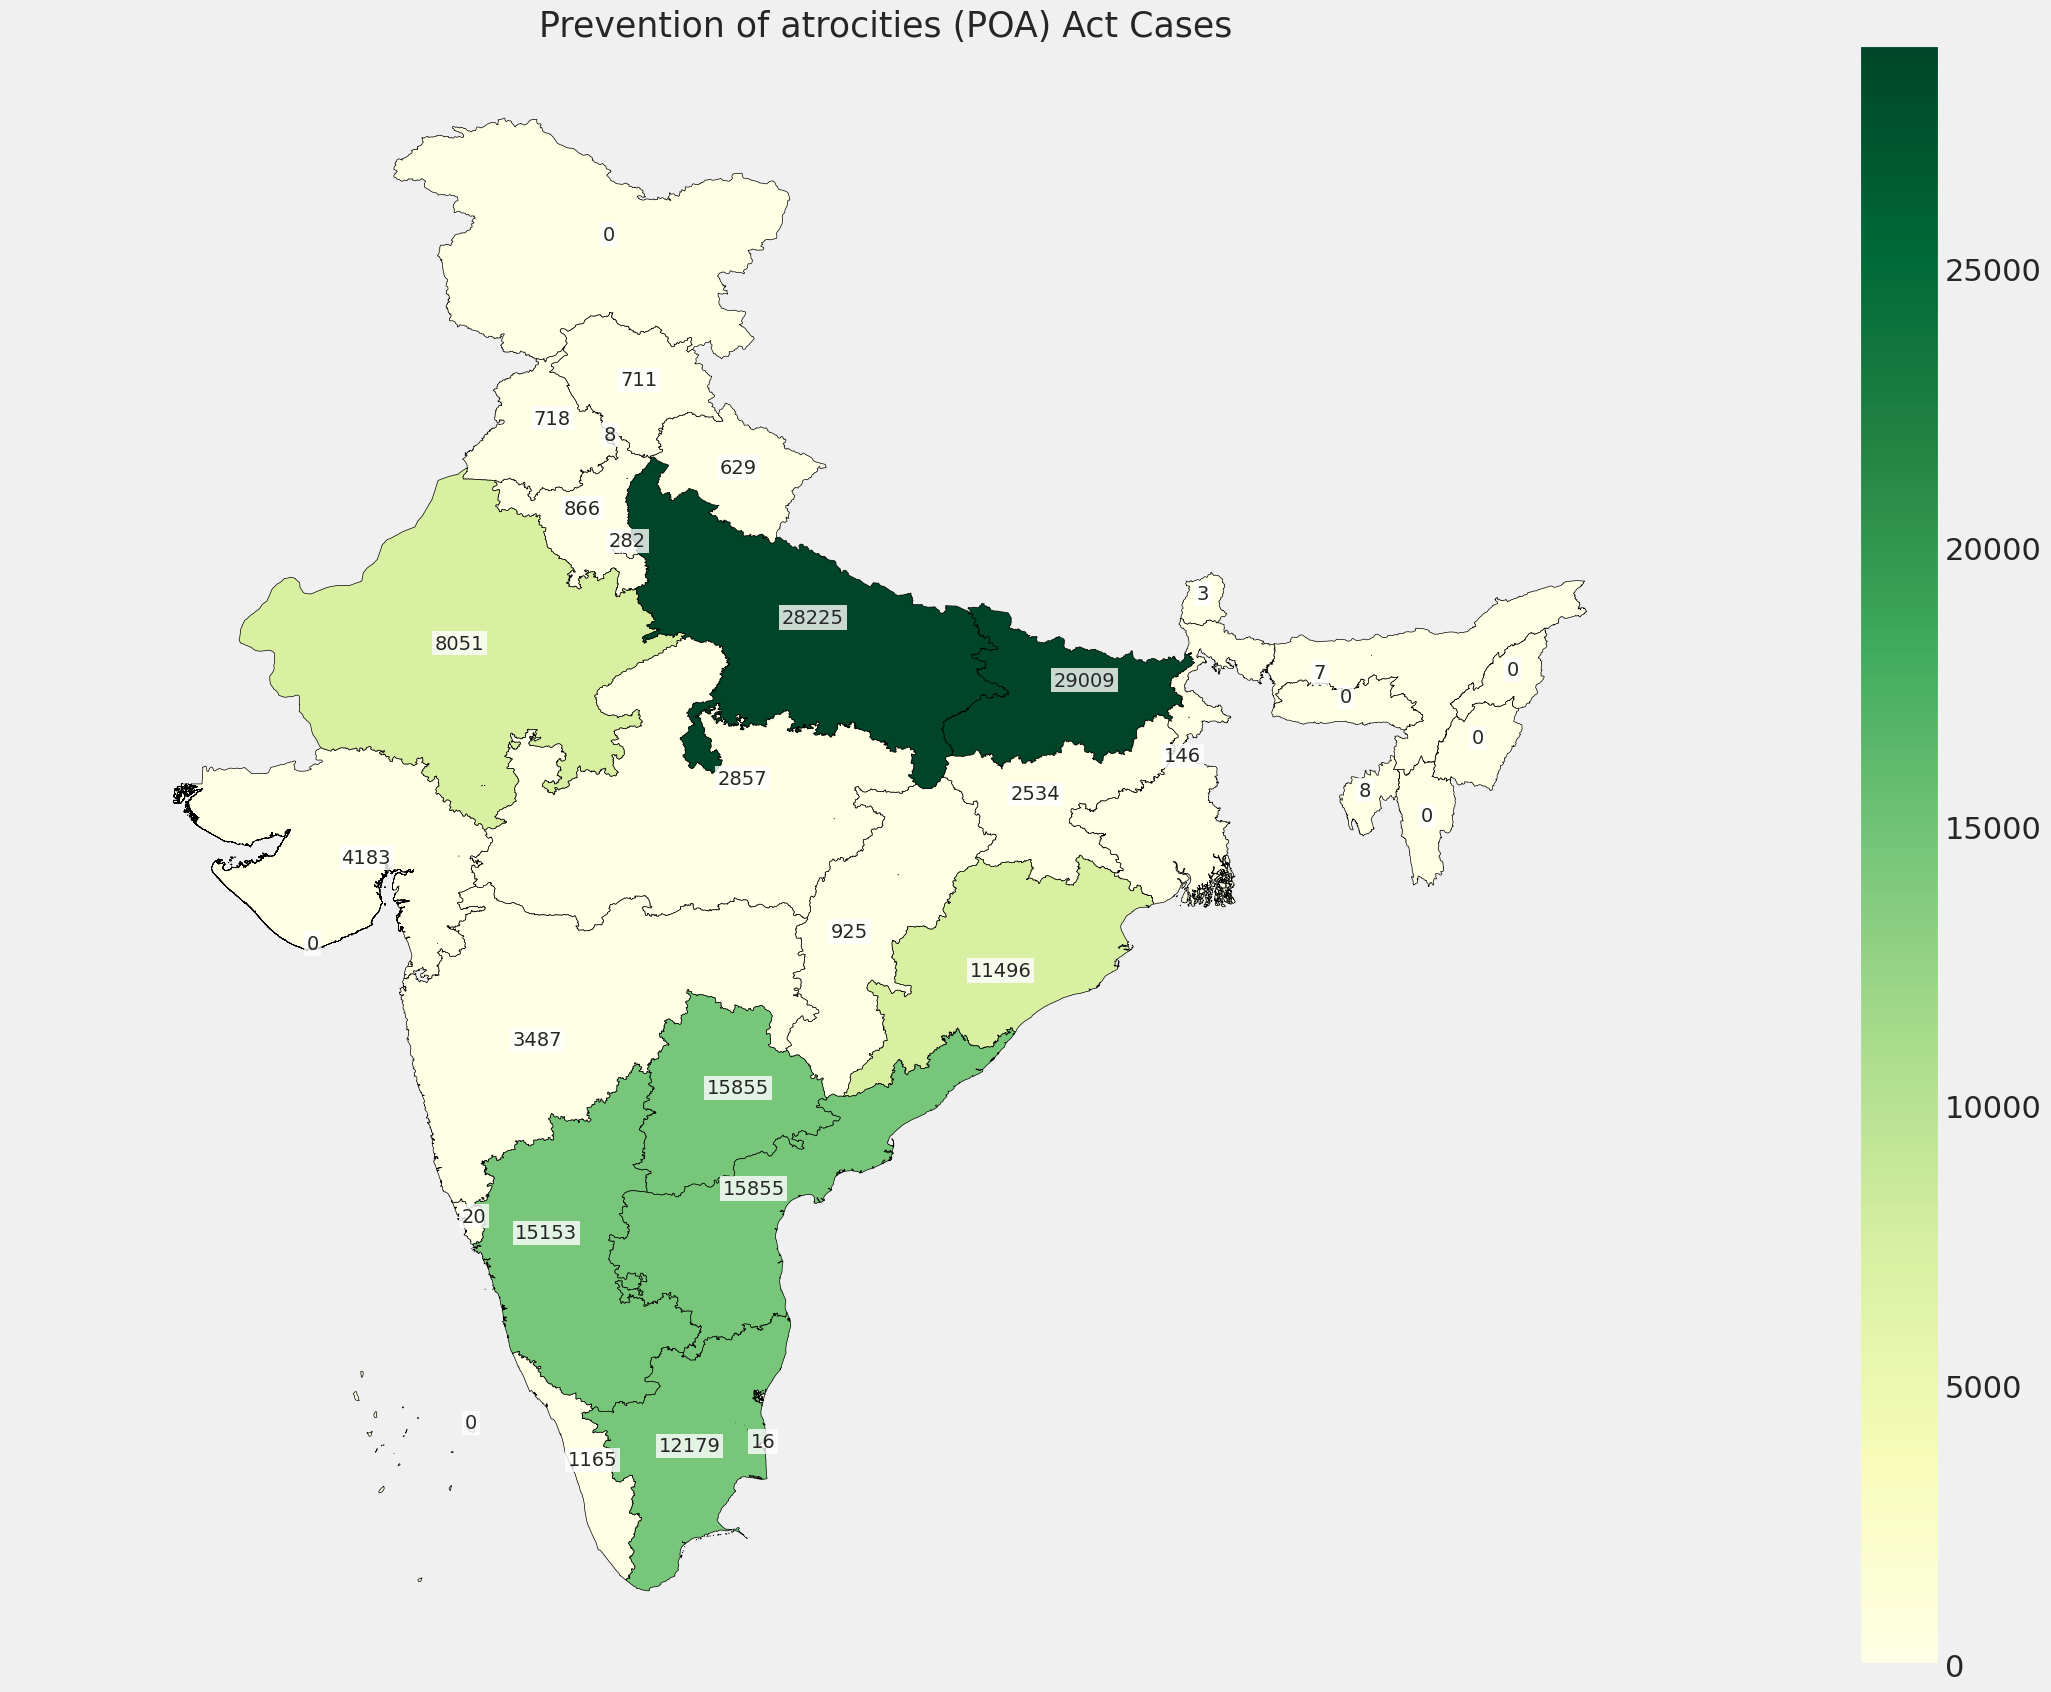

In [ ]:
figsize = (25, 20)


ax= merged1.dropna().plot(column= 'Prevention of atrocities (POA) Act', cmap=cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')

ax.set_title(" Prevention of atrocities (POA) Act Cases" , size = 25)
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Prevention of atrocities (POA) Act'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})

norm = Normalize(vmin=merged1['Prevention of atrocities (POA) Act'].min(), vmax= merged1['Prevention of atrocities (POA) Act'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

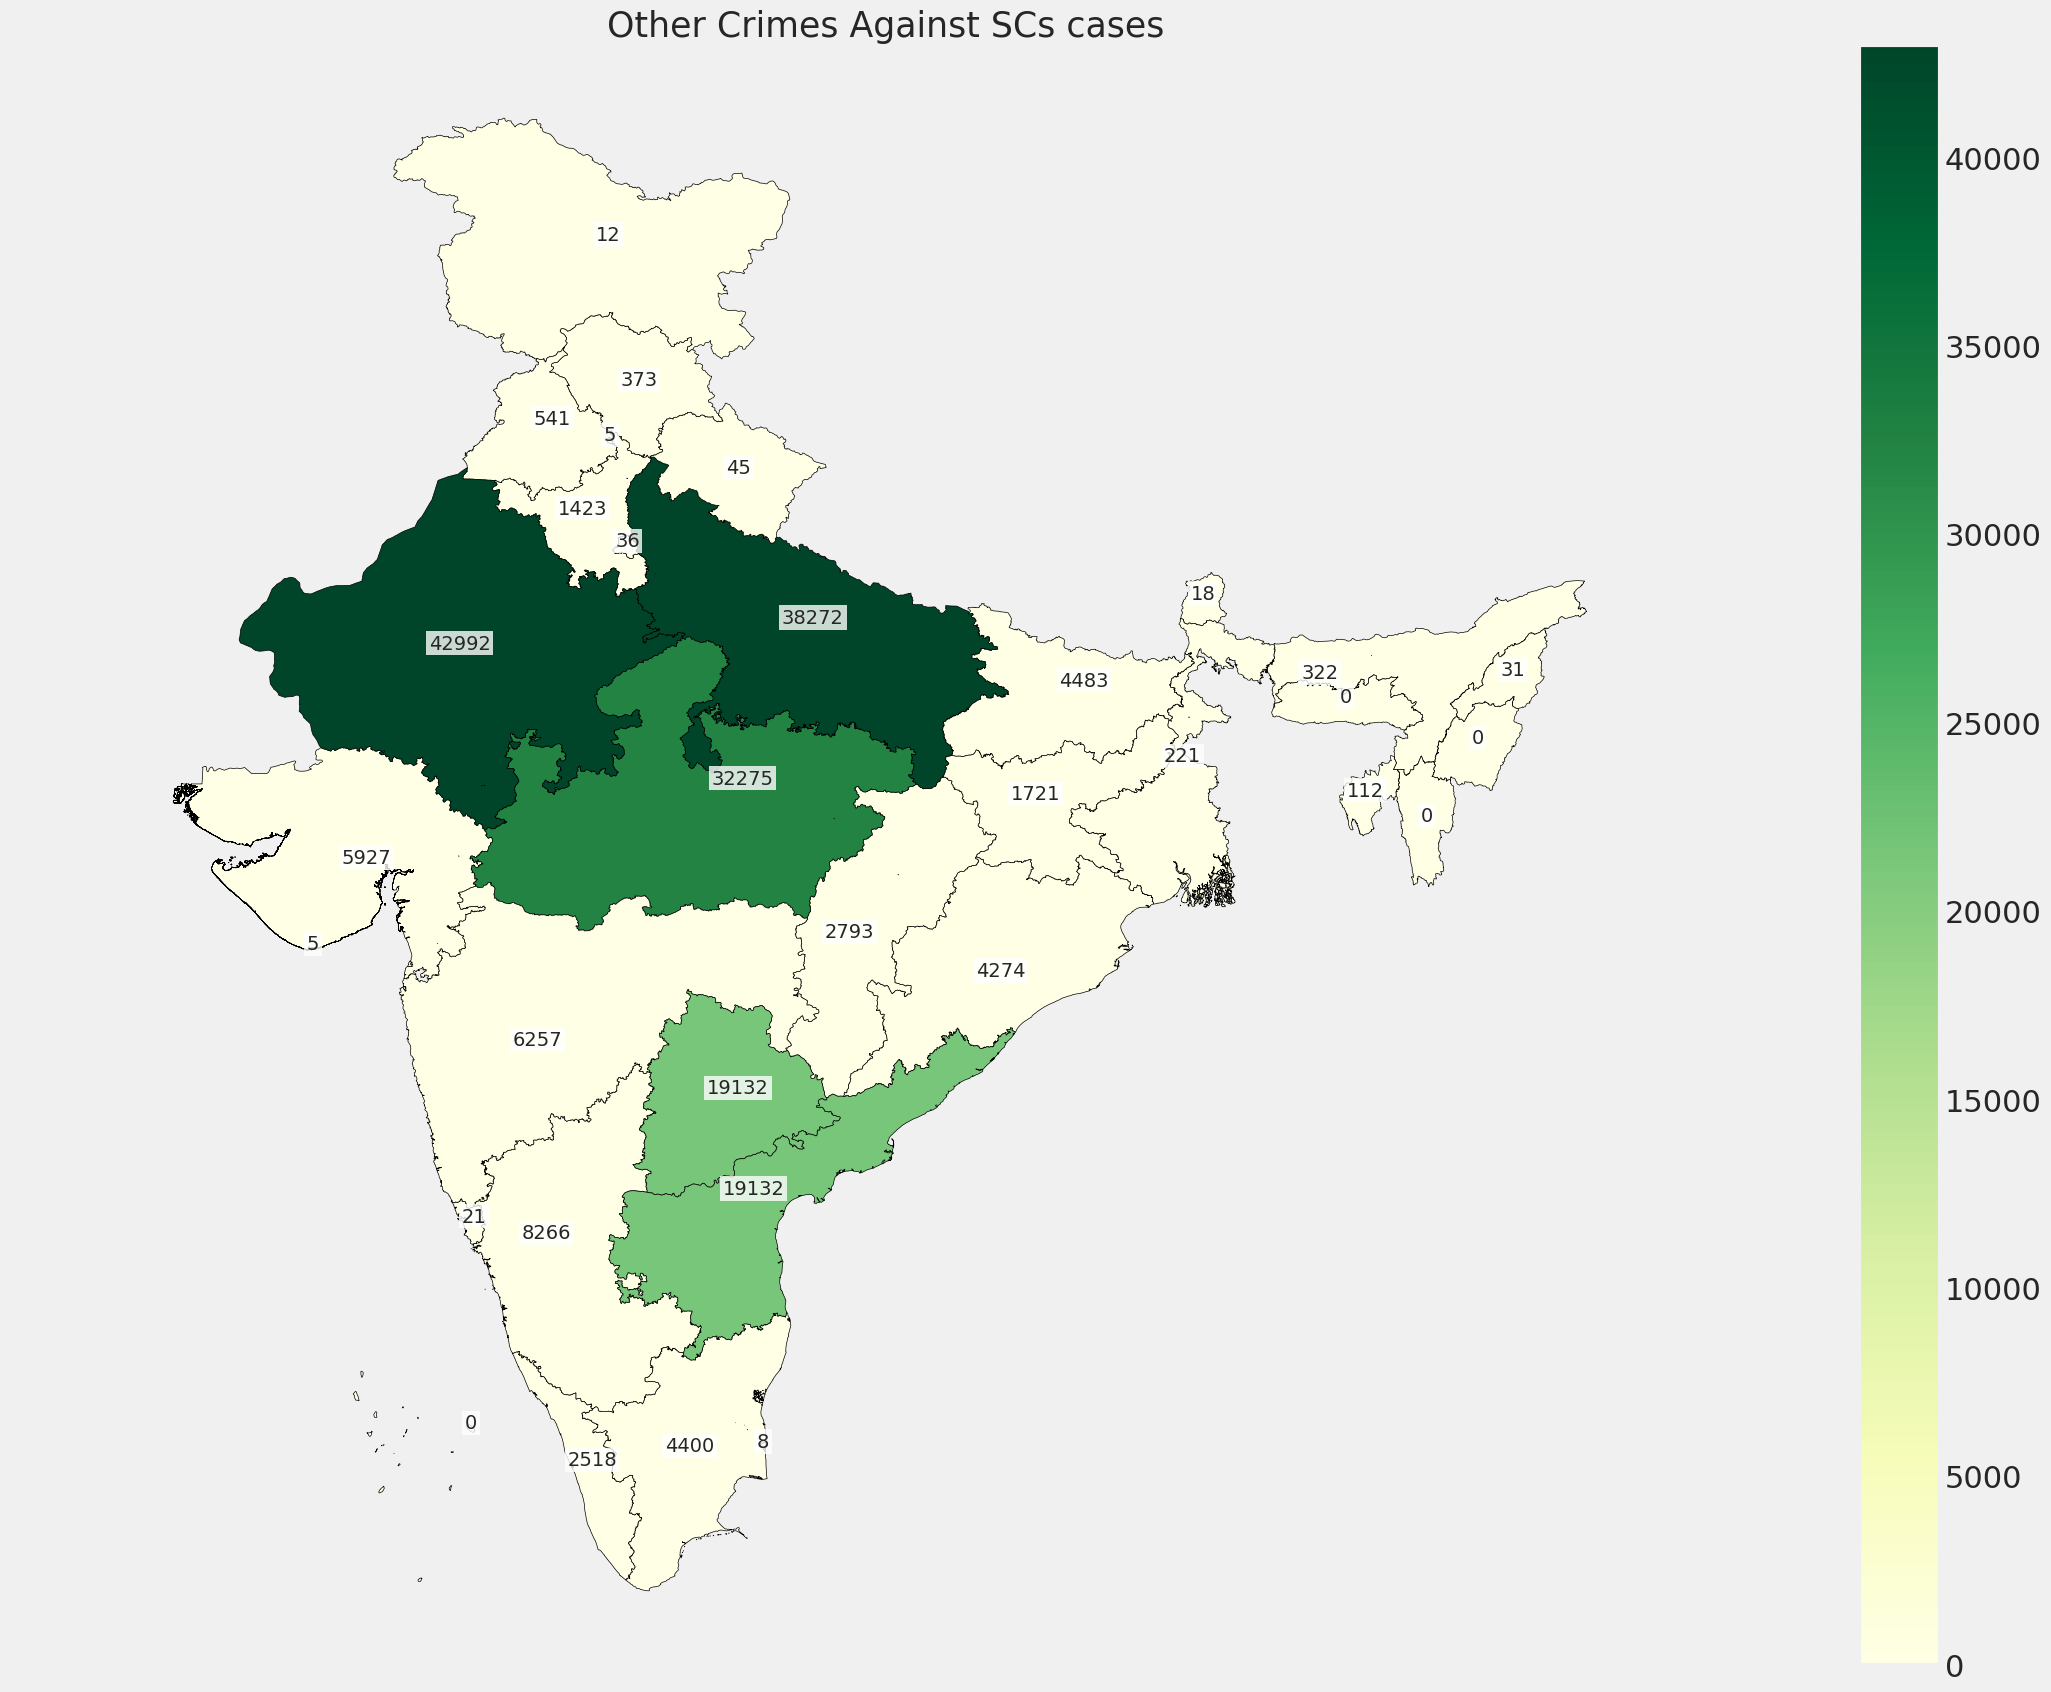

In [ ]:
merged1['coords'] = merged1['geometry'].apply(lambda x: x.representative_point().coords[:])
merged1['coords'] = [coords[0] for coords in merged1['coords']]
figsize = (25, 20)


ax= merged1.dropna().plot(column= 'Other Crimes Against SCs', cmap= cmap, figsize=figsize, scheme='equal_interval' ,edgecolor='black')
for idx, row in merged1.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Other Crimes Against SCs'], horizontalalignment='center', bbox={'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})


ax.set_title(" Other Crimes Against SCs cases" , size = 25)


norm = Normalize(vmin=merged1['Other Crimes Against SCs'].min(), vmax= merged1['Other Crimes Against SCs'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()


**Crime Against SCs District Wise**

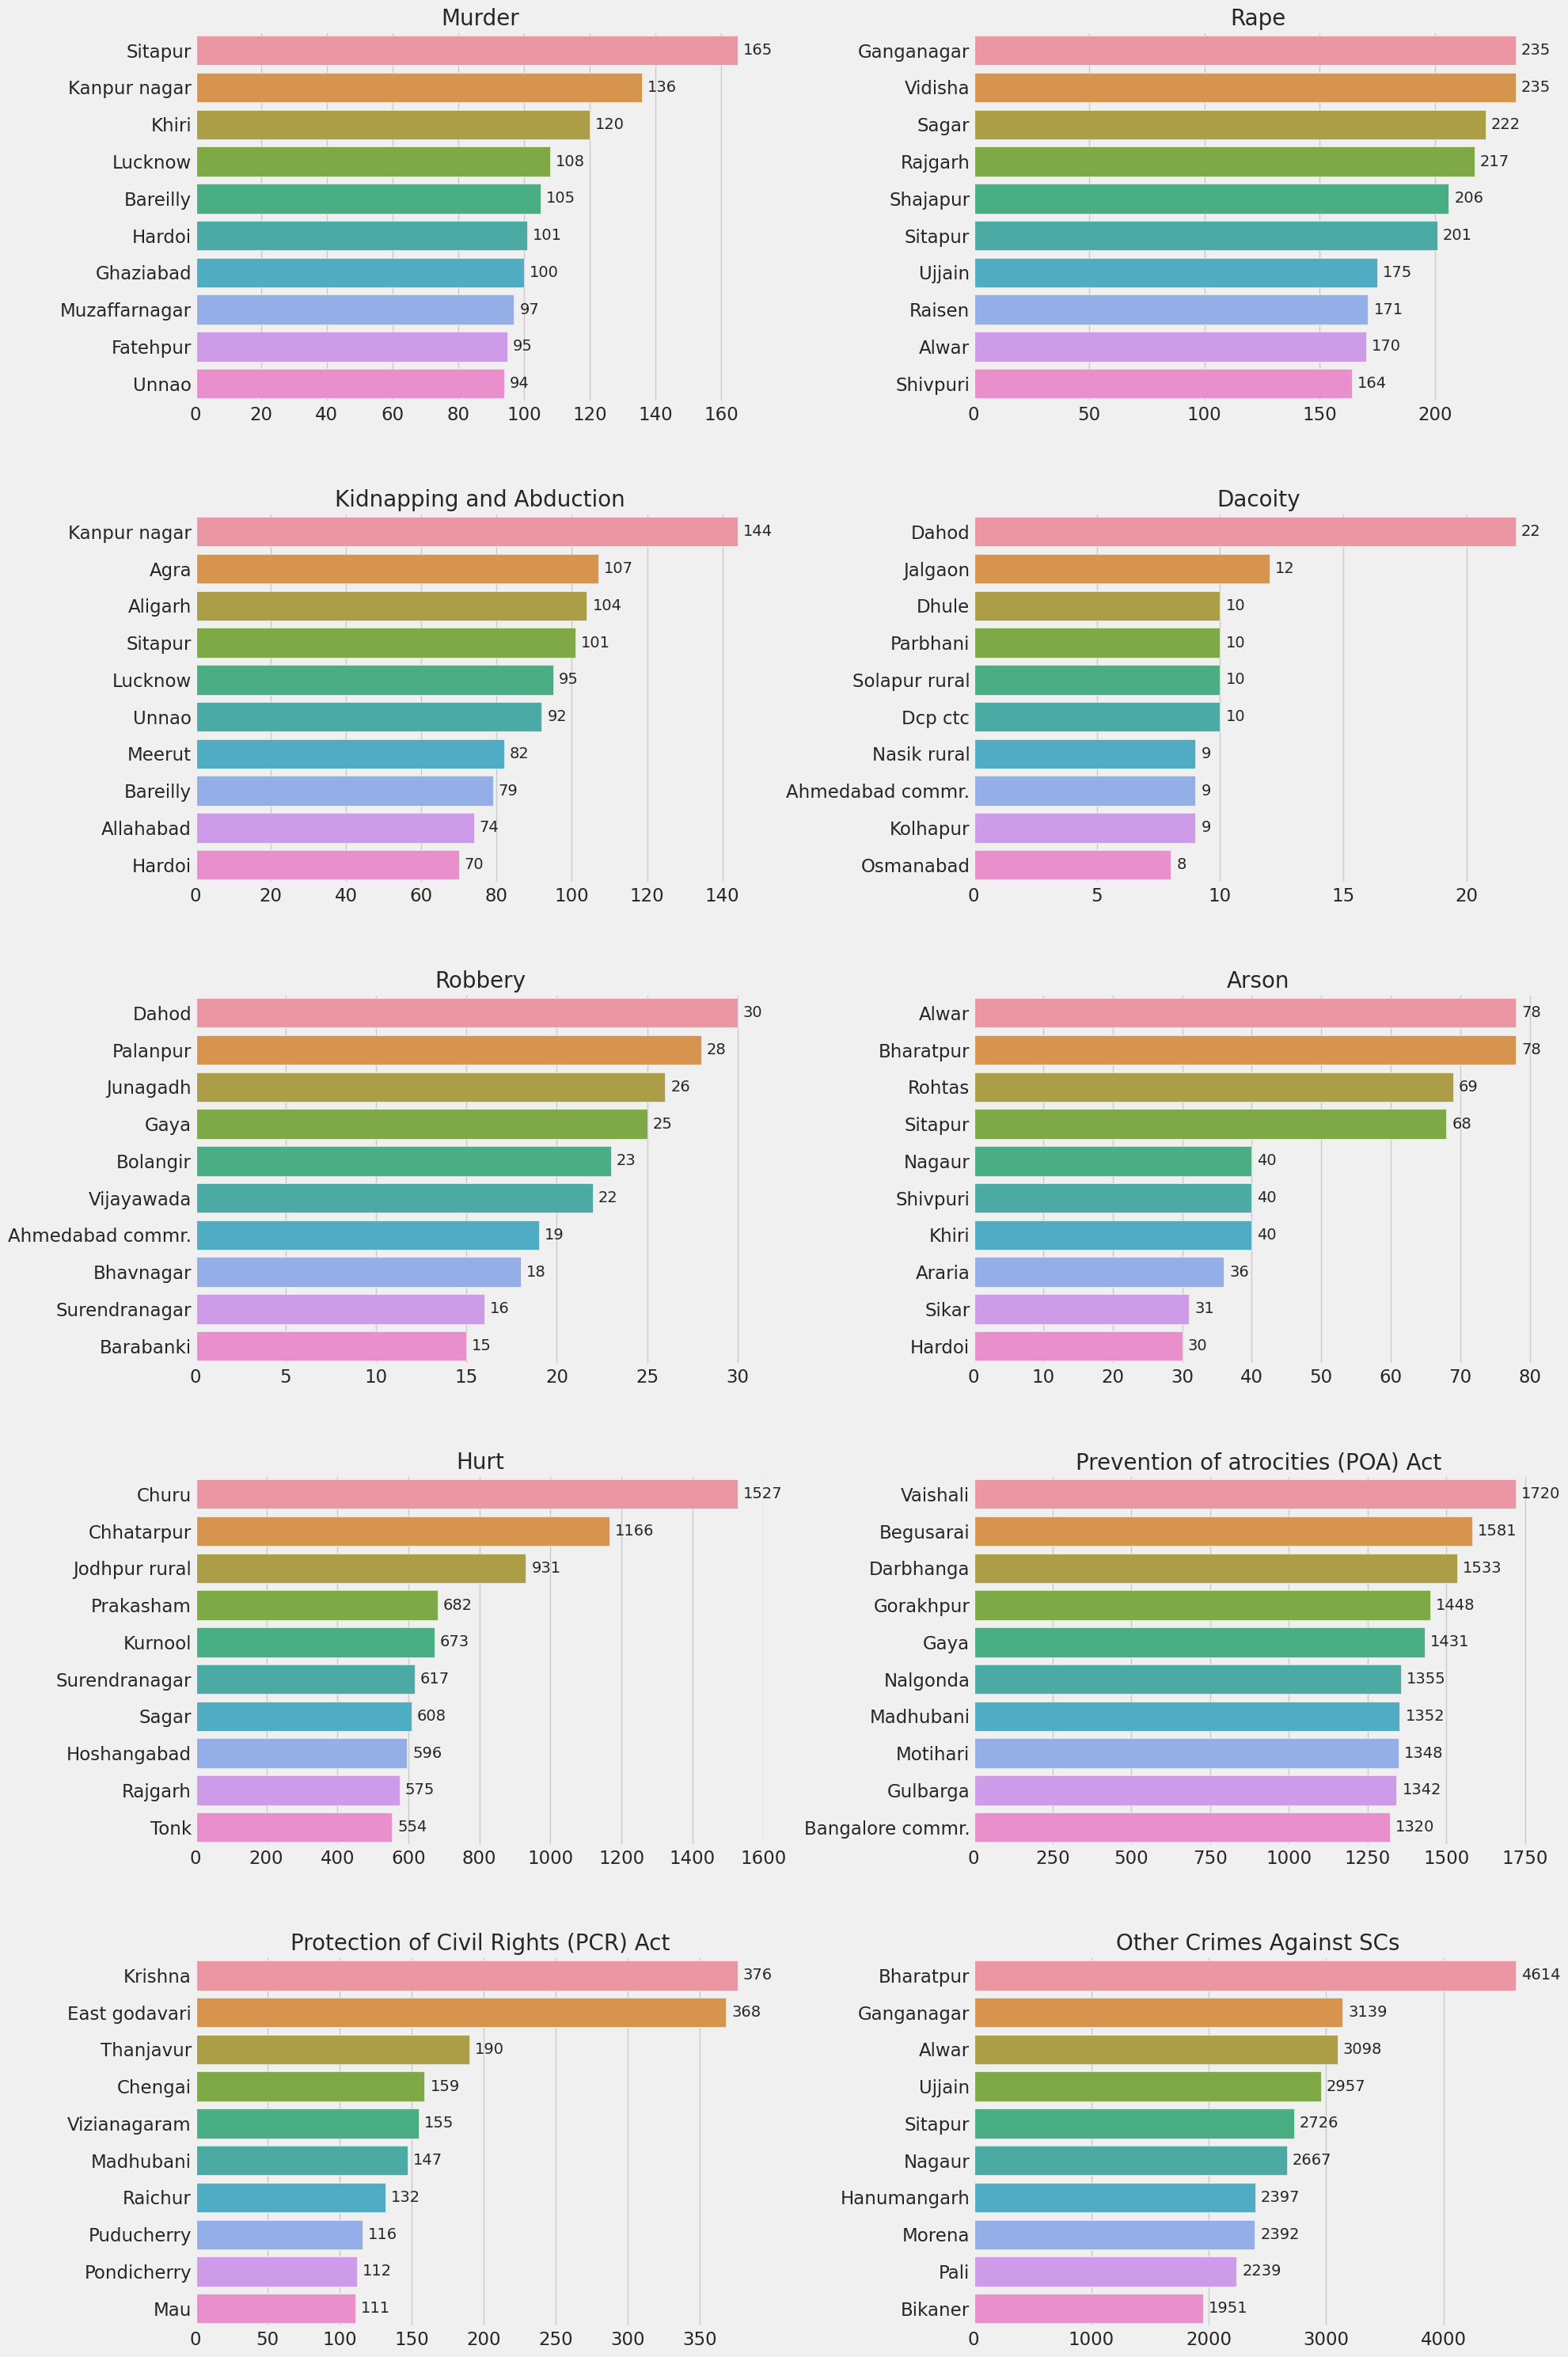

In [ ]:
scd = sc[sc.DISTRICT != 'Total']
scd = scd.groupby(['DISTRICT'])['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'].sum().reset_index()


sns.set_context("talk")

plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')

for i,column in enumerate(columns):
    scd1 = scd.sort_values(column,ascending = False)
    scd1 = scd1.head(10)
    plt.subplot(5,2,i+1)
    ax= sns.barplot(data= scd1,x= column ,y='DISTRICT' )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
        ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")


plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [ ]:
scd['sum'] = scd['Murder']+scd['Rape']+scd['Kidnapping and Abduction']+scd['Dacoity']+scd['Robbery']+scd['Arson']+scd['Hurt']+scd['Prevention of atrocities (POA) Act']+scd['Protection of Civil Rights (PCR) Act']+scd['Other Crimes Against SCs']
mostviolent = scd.groupby(['DISTRICT'])['sum'].sum().sort_values(ascending = False).reset_index()
mostviolent = mostviolent.head(15)
mostviolent.sample(10)

DISTRICT   sum
9        Nalgonda  2899
0       Bharatpur  5632
2         Sitapur  4021
4         Kurnool  3684
8     Hanumangarh  2901
12   Kanpur nagar  2827
13      Barabanki  2821
10  West godavari  2889
1      Ganganagar  4066
11       Gulbarga  2840

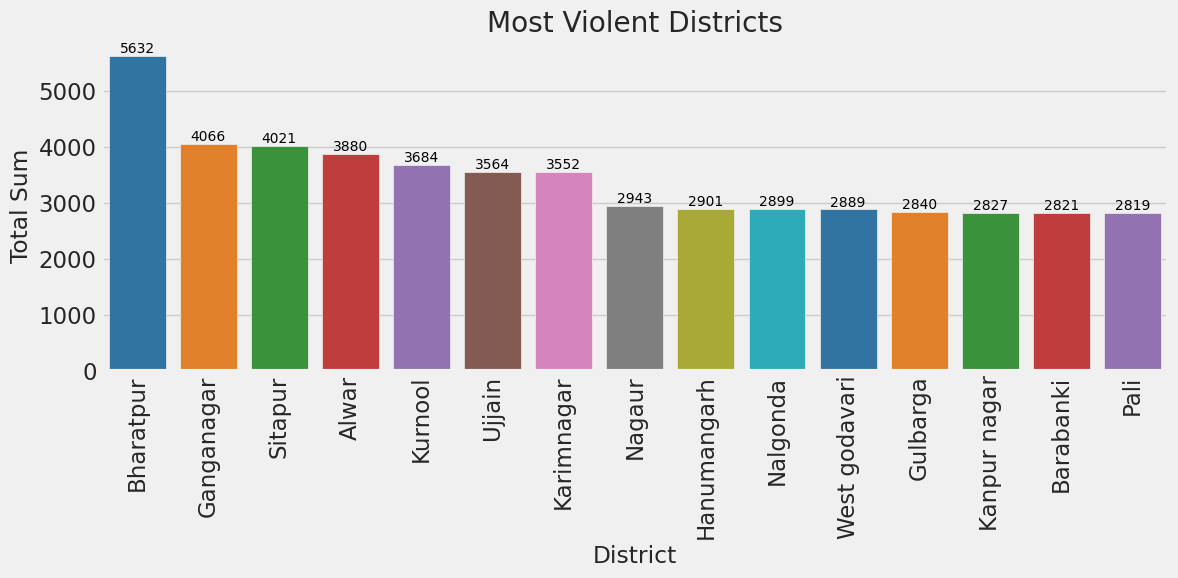

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
mostviolent = mostviolent.sort_values(by='sum', ascending=False)  # Sort the data for better visualization
districts = mostviolent['DISTRICT']
sum_values = mostviolent['sum']

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=districts, y=sum_values, palette='tab10')

# Add data labels on top of bars
for i, v in enumerate(sum_values):
    plt.text(i, v + 50, str(v), horizontalalignment='center', fontsize=10, color='black')

# Customize the plot
plt.title('Most Violent Districts')
plt.xlabel('District')
plt.ylabel('Total Sum')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()